# Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from os.path import join

path = "/content/gdrive/My Drive/USA_project"

inflation_data = pd.read_csv(join(path, 'Inflation_CPI_US.csv'))
interest_rate_data = pd.read_csv(join(path, 'Interestrates_US.csv'))
house_price_index_data = pd.read_csv(join(path, 'House_price_index.csv'))
stock_market_data = pd.read_csv(join(path, 'Market.csv'))
mortgage_debt_service_data = pd.read_csv(join(path, 'Mortgagedebt_service.csv'))
GDP_data = pd.read_csv(join(path, 'GDP.csv'))
Unemployment_data = pd.read_csv(join(path, 'UNRATE.csv'))


# Preprocessing

In [ ]:
# Check for missing values in each dataset
print("Missing values in Inflation Data:")
print(inflation_data.isnull().sum())

print("\nMissing values in Interest Rate Data:")
print(interest_rate_data.isnull().sum())

# Forward Fill missing values
stock_market_data = stock_market_data.fillna(method='ffill')

# Verify after forward filling
print("Missing values after forward filling:")
print(stock_market_data.isnull().sum())

print("\nMissing values in Mortgage Debt Service Data:")
print(mortgage_debt_service_data.isnull().sum())

print("\nMissing values in Housing Price Index Data:")
print(house_price_index_data.isnull().sum())

print("\nMissing values in GDP Data:")
print(GDP_data.isnull().sum())

print("\nMissing values in Unemployment Data:")
print(Unemployment_data.isnull().sum())

Missing values in Inflation Data:
observation_date    0
CPIAUCSL            0
dtype: int64

Missing values in Interest Rate Data:
observation_date    0
FEDFUNDS            0
dtype: int64
Missing values after forward filling:
Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values in Mortgage Debt Service Data:
observation_date    0
MDSP                0
dtype: int64

Missing values in Housing Price Index Data:
observation_date    0
USSTHPI             0
dtype: int64

Missing values in GDP Data:
observation_date    0
GDP                 0
dtype: int64

Missing values in Unemployment Data:
observation_date    0
UNRATE              0
dtype: int64


<ipython-input-4-221d59d67efa>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_market_data = stock_market_data.fillna(method='ffill')


In [ ]:
# Check column names of all datasets
print("Inflation Data columns:", inflation_data.columns)
print("Interest Rate Data columns:", interest_rate_data.columns)
print("Stock Market Data columns:", stock_market_data.columns)
print("Mortgage Debt Service Data columns:", mortgage_debt_service_data.columns)
print("House Price Index Data columns:", house_price_index_data.columns)
print("GDP Data columns:", GDP_data.columns)
print("Unemployment Data columns:", Unemployment_data.columns)

Inflation Data columns: Index(['observation_date', 'CPIAUCSL'], dtype='object')
Interest Rate Data columns: Index(['observation_date', 'FEDFUNDS'], dtype='object')
Stock Market Data columns: Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Mortgage Debt Service Data columns: Index(['observation_date', 'MDSP'], dtype='object')
House Price Index Data columns: Index(['observation_date', 'USSTHPI'], dtype='object')
GDP Data columns: Index(['observation_date', 'GDP'], dtype='object')
Unemployment Data columns: Index(['observation_date', 'UNRATE'], dtype='object')


In [ ]:
# Rename columns for consistency
stock_market_data = stock_market_data.rename(columns={'Date': 'observation_date'})

# Convert 'Date' column to datetime format

stock_market_data['observation_date'] = pd.to_datetime(stock_market_data['observation_date'], errors='coerce')
inflation_data['observation_date'] = pd.to_datetime(inflation_data['observation_date'], errors='coerce')
interest_rate_data['observation_date'] = pd.to_datetime(interest_rate_data['observation_date'], errors='coerce')
mortgage_debt_service_data['observation_date'] = pd.to_datetime(mortgage_debt_service_data['observation_date'], errors='coerce')
house_price_index_data['observation_date'] = pd.to_datetime(house_price_index_data['observation_date'], errors='coerce')
GDP_data['observation_date'] = pd.to_datetime(GDP_data['observation_date'], errors='coerce')
Unemployment_data['observation_date'] = pd.to_datetime(Unemployment_data['observation_date'], errors='coerce')

In [ ]:
# Define the common start and end dates for the analysis
start_date = '2000-01-01'
end_date = '2025-01-01'

# Filter datasets to only include rows within this time range
inflation_data = inflation_data[(inflation_data['observation_date'] >= start_date) & (inflation_data['observation_date'] <= end_date)]
interest_rate_data = interest_rate_data[(interest_rate_data['observation_date'] >= start_date) & (interest_rate_data['observation_date'] <= end_date)]
stock_market_data = stock_market_data[(stock_market_data['observation_date'] >= start_date) & (stock_market_data['observation_date'] <= end_date)]
mortgage_debt_service_data = mortgage_debt_service_data[(mortgage_debt_service_data['observation_date'] >= start_date) & (mortgage_debt_service_data['observation_date'] <= end_date)]
house_price_index_data = house_price_index_data[(house_price_index_data['observation_date'] >= start_date) & (house_price_index_data['observation_date'] <= end_date)]
GDP_data = GDP_data[(GDP_data['observation_date'] >= start_date) & (GDP_data['observation_date'] <= end_date)]
Unemployment_data = Unemployment_data[(Unemployment_data['observation_date'] >= start_date) & (Unemployment_data['observation_date'] <= end_date)]

In [ ]:
# Make sure all date columns are in datetime format before merging
inflation_data['observation_date'] = pd.to_datetime(inflation_data['observation_date'], errors='coerce')
interest_rate_data['observation_date'] = pd.to_datetime(interest_rate_data['observation_date'], errors='coerce')
stock_market_data['observation_date'] = pd.to_datetime(stock_market_data['observation_date'], errors='coerce')
mortgage_debt_service_data['observation_date'] = pd.to_datetime(mortgage_debt_service_data['observation_date'], errors='coerce')
house_price_index_data['observation_date'] = pd.to_datetime(house_price_index_data['observation_date'], errors='coerce')
GDP_data['observation_date'] = pd.to_datetime(GDP_data['observation_date'], errors='coerce')
Unemployment_data['observation_date'] = pd.to_datetime(Unemployment_data['observation_date'], errors='coerce')

In [ ]:
# Merge inflation data with house price index data
inflation_house_price_index_data = pd.merge(house_price_index_data, inflation_data, left_on='observation_date', right_on='observation_date', how='inner')

# Check the first few rows
inflation_house_price_index_data

,observation_date,USSTHPI,CPIAUCSL
0,2000-01-01,230.12,169.300
1,2000-04-01,233.87,170.900
2,2000-07-01,238.14,172.700
3,2000-10-01,241.78,173.900
4,2001-01-01,247.76,175.600
...,...,...,...
95,2023-10-01,655.69,307.653
96,2024-01-01,664.22,309.794
97,2024-04-01,681.11,313.016
98,2024-07-01,687.80,313.566


In [ ]:
# Merge interest rate data (FEDFUNDS) with house price index data (USSTHPI)
interest_rate_house_price_index_data = pd.merge(house_price_index_data, interest_rate_data, left_on='observation_date', right_on='observation_date', how='inner')

interest_rate_house_price_index_data

,observation_date,USSTHPI,FEDFUNDS
0,2000-01-01,230.12,5.45
1,2000-04-01,233.87,6.02
2,2000-07-01,238.14,6.54
3,2000-10-01,241.78,6.51
4,2001-01-01,247.76,5.98
...,...,...,...
95,2023-10-01,655.69,5.33
96,2024-01-01,664.22,5.33
97,2024-04-01,681.11,5.33
98,2024-07-01,687.80,5.33


In [ ]:
# Merge mortgage debt service data (MDSP) with house price index data (USSTHPI)
mortgage_debt_service_house_price_index_data = pd.merge(house_price_index_data, mortgage_debt_service_data, left_on='observation_date', right_on='observation_date', how='inner')

mortgage_debt_service_house_price_index_data

,observation_date,USSTHPI,MDSP
0,2000-01-01,230.12,5.603787
1,2000-04-01,233.87,5.649237
2,2000-07-01,238.14,5.681759
3,2000-10-01,241.78,5.726554
4,2001-01-01,247.76,5.720924
...,...,...,...
94,2023-07-01,653.73,5.678232
95,2023-10-01,655.69,5.704593
96,2024-01-01,664.22,5.714631
97,2024-04-01,681.11,5.773469


In [ ]:
# Aggregate the stock market data by observation_date (mean of stock market columns)
stock_market_data_aggregated = stock_market_data.groupby('observation_date').agg({
    'Open': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Close': 'mean',
    'Adj Close': 'mean',
    'Volume': 'sum',  # Summing up volume across all indices for each day
}).reset_index()
# Merge aggregated stock market data with house price index data
stock_market_house_price_index_data = pd.merge(house_price_index_data, stock_market_data_aggregated, left_on='observation_date', right_on='observation_date', how='inner')

# Check the first few rows
print(stock_market_house_price_index_data.head())

  observation_date  USSTHPI         Open         High          Low  \
0       2001-01-01   247.76  6523.404824  6591.483868  6491.942518   
1       2001-10-01   258.99  4484.036636  4533.072283  4437.209246   
2       2002-01-01   262.71  5307.166791  5345.839960  5285.770618   
3       2002-04-01   267.19  5227.036376  5265.060613  5207.689758   
4       2002-07-01   272.49  4788.739416  4826.266774  4744.028514   

         Close    Adj Close        Volume  
0  6545.596765  6545.589685  4.925338e+09  
1  4514.056468  4514.052053  1.107344e+10  
2  5322.317096  5322.311310  4.647204e+09  
3  5238.506358  5238.501434  1.099218e+10  
4  4771.973796  4771.968913  2.027573e+10  


In [ ]:
# Merge GDP data with house price index data
GDP_house_price_index_data = pd.merge(house_price_index_data, GDP_data, left_on='observation_date', right_on='observation_date', how='inner')

# Check the first few rows
GDP_house_price_index_data

,observation_date,USSTHPI,GDP
0,2000-01-01,230.12,10002.179
1,2000-04-01,233.87,10247.720
2,2000-07-01,238.14,10318.165
3,2000-10-01,241.78,10435.744
4,2001-01-01,247.76,10470.231
...,...,...,...
95,2023-10-01,655.69,28296.967
96,2024-01-01,664.22,28624.069
97,2024-04-01,681.11,29016.714
98,2024-07-01,687.80,29374.914


In [ ]:
# Merge Unemployment data with house price index data
Unemployment_house_price_index_data = pd.merge(house_price_index_data, Unemployment_data, left_on='observation_date', right_on='observation_date', how='inner')

# Check the first few rows
Unemployment_house_price_index_data

,observation_date,USSTHPI,UNRATE
0,2000-01-01,230.12,4.0
1,2000-04-01,233.87,3.8
2,2000-07-01,238.14,4.0
3,2000-10-01,241.78,3.9
4,2001-01-01,247.76,4.2
...,...,...,...
95,2023-10-01,655.69,3.9
96,2024-01-01,664.22,3.7
97,2024-04-01,681.11,3.9
98,2024-07-01,687.80,4.2


In [ ]:
# EDA
print(inflation_house_price_index_data.describe())
print(interest_rate_house_price_index_data.describe())
print(mortgage_debt_service_house_price_index_data.describe())
print(stock_market_house_price_index_data.describe())
print(GDP_house_price_index_data.describe())
print(Unemployment_house_price_index_data.describe())


          observation_date     USSTHPI    CPIAUCSL
count                  100  100.000000  100.000000
mean   2012-05-16 13:40:48  386.679700  229.420570
min    2000-01-01 00:00:00  230.120000  169.300000
25%    2006-03-09 12:00:00  315.052500  200.350000
50%    2012-05-16 12:00:00  354.860000  228.888500
75%    2018-07-24 00:00:00  421.917500  251.550750
max    2024-10-01 00:00:00  690.900000  315.564000
std                    NaN  115.198626   38.111656
          observation_date     USSTHPI    FEDFUNDS
count                  100  100.000000  100.000000
mean   2012-05-16 13:40:48  386.679700    1.922800
min    2000-01-01 00:00:00  230.120000    0.050000
25%    2006-03-09 12:00:00  315.052500    0.140000
50%    2012-05-16 12:00:00  354.860000    1.195000
75%    2018-07-24 00:00:00  421.917500    3.387500
max    2024-10-01 00:00:00  690.900000    6.540000
std                    NaN  115.198626    2.032656
                    observation_date     USSTHPI       MDSP
count                 

# Visualization

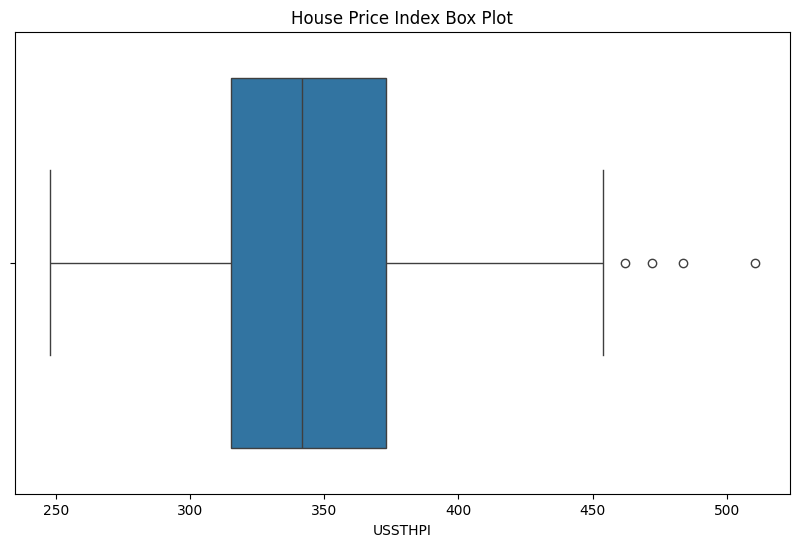

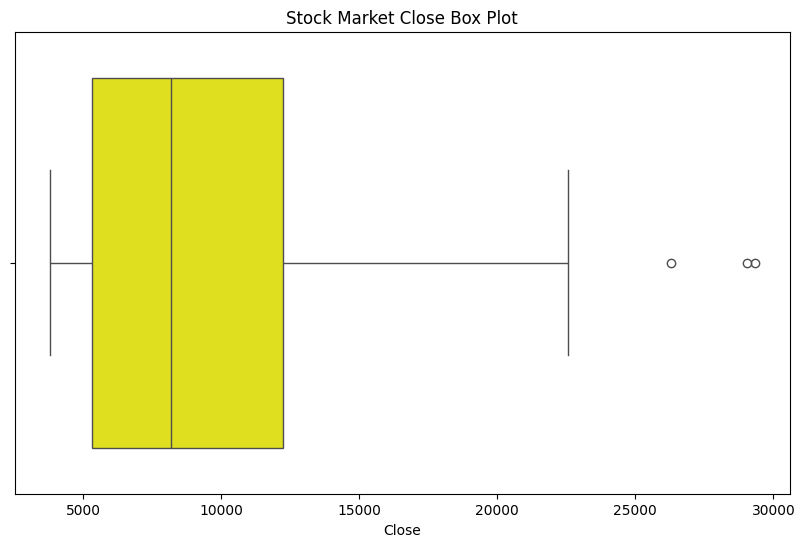

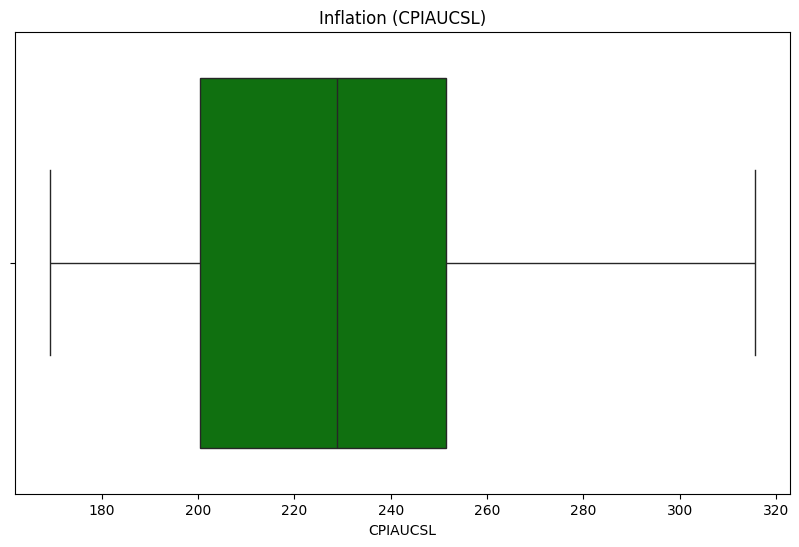

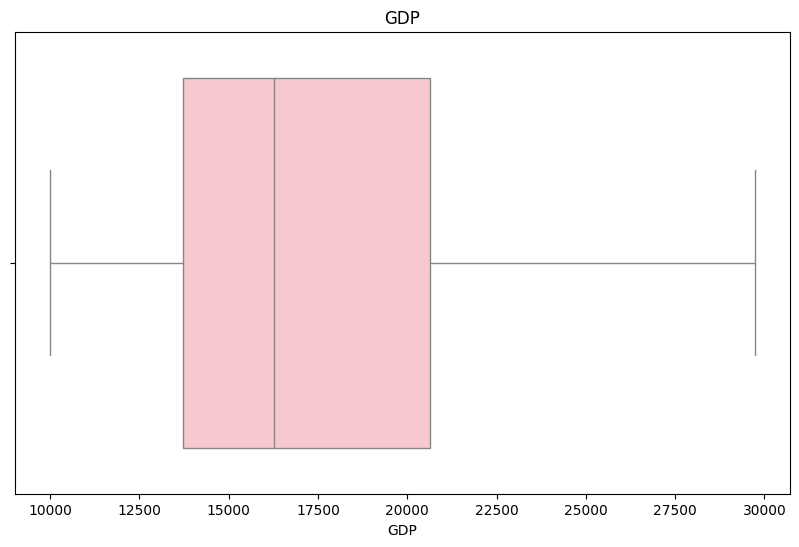

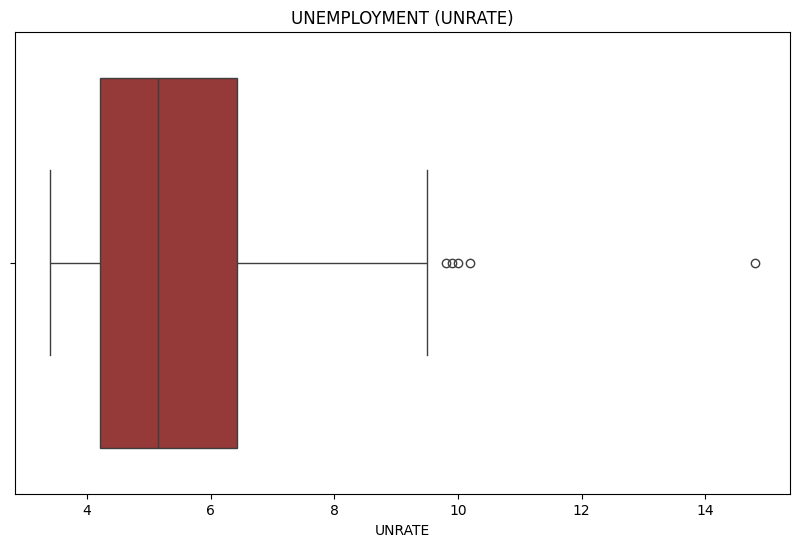

In [ ]:
# Checking for outliers for each data sets

save_path = "/content/gdrive/My Drive/USA_project"
# Boxplot for House Price Index (USSTHPI)
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_market_house_price_index_data['USSTHPI'])
plt.title('House Price Index Box Plot')
plt.savefig(save_path + 'house_price_index_boxplot.png')  # Save the plot as PNG
plt.show()

# Boxplot for stock market data
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_market_house_price_index_data['Close'],color='yellow')
plt.title('Stock Market Close Box Plot')
plt.show()

# Boxplot for inflation
plt.figure(figsize=(10, 6))
sns.boxplot(data=inflation_house_price_index_data, x='CPIAUCSL', color='green')
plt.title('Inflation (CPIAUCSL)')
plt.xlabel('CPIAUCSL')
plt.show()

# Boxplot for GDP
plt.figure(figsize=(10, 6))
sns.boxplot(data=GDP_house_price_index_data, x='GDP', color='pink')
plt.title('GDP')
plt.xlabel('GDP')
plt.show()


# Boxplot for Unemployment
plt.figure(figsize=(10, 6))
sns.boxplot(data=Unemployment_house_price_index_data, x='UNRATE', color='brown')
plt.title('UNEMPLOYMENT (UNRATE)')
plt.xlabel('UNRATE')
plt.show()




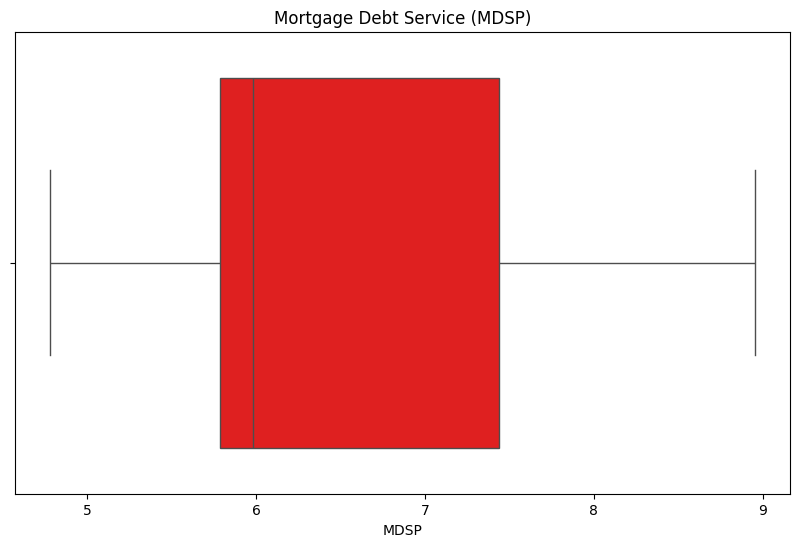

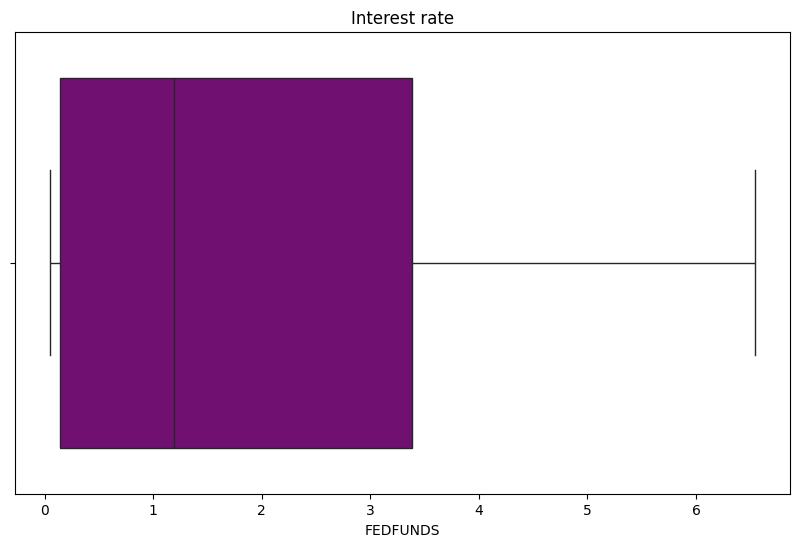

In [ ]:
# Boxplot for Mortgage Debt Service (MDSP)
plt.figure(figsize=(10, 6))
sns.boxplot(data=mortgage_debt_service_house_price_index_data, x='MDSP', color='red')
plt.title('Mortgage Debt Service (MDSP)')
plt.xlabel('MDSP')
plt.show()
# Box plot for interest rate
plt.figure(figsize=(10, 6))
sns.boxplot(interest_rate_house_price_index_data, x='FEDFUNDS', color='purple')
plt.title('Interest rate')
plt.xlabel('FEDFUNDS')
plt.show()

In [ ]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe by removing rows with outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

# Apply the same for other datasets
inflation_data_clean = remove_outliers(inflation_data, 'CPIAUCSL')
interest_rate_data_clean = remove_outliers(interest_rate_data, 'FEDFUNDS')
stock_market_data_clean = remove_outliers(stock_market_data, 'Close')
mortgage_debt_service_data_clean = remove_outliers(mortgage_debt_service_data, 'MDSP')
house_price_index_data_clean = remove_outliers(house_price_index_data, 'USSTHPI')
GDP_data_clean = remove_outliers(GDP_data, 'GDP')
Unemployment_data_clean = remove_outliers(Unemployment_data, 'UNRATE')

# Verify the cleaned datasets' shapes
print(inflation_data_clean.shape)
print(interest_rate_data_clean.shape)
print(stock_market_data_clean.shape)
print(mortgage_debt_service_data_clean.shape)
print(GDP_data_clean.shape)
print(Unemployment_data_clean.shape)

(301, 2)
(301, 2)
(66827, 8)
(99, 2)
(101, 2)
(288, 2)


In [ ]:
# Merging the clean data sets
interest_rate_house_price_index_data_clean = pd.merge(house_price_index_data_clean, interest_rate_data_clean, left_on='observation_date', right_on='observation_date', how='inner')
mortgage_debt_service_house_price_index_data_clean = pd.merge(house_price_index_data_clean, mortgage_debt_service_data_clean, left_on='observation_date', right_on='observation_date', how='inner')
stock_market_data_aggregated_clean = stock_market_data_clean.groupby('observation_date').agg({
    'Open': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Close': 'mean',
    'Adj Close': 'mean',
    'Volume': 'sum',  # Summing up volume across all indices for each day
}).reset_index()
GDP_house_price_index_data_clean = pd.merge(house_price_index_data_clean, GDP_data_clean, left_on='observation_date', right_on='observation_date', how='inner')
Unemployment_house_price_index_data_clean = pd.merge(house_price_index_data_clean, Unemployment_data_clean, left_on='observation_date', right_on='observation_date', how='inner')
stock_market_house_price_index_data_clean = pd.merge(house_price_index_data_clean, stock_market_data_aggregated_clean, left_on='observation_date', right_on='observation_date', how='inner')
# Merge inflation data with house price index data
inflation_house_price_index_data_clean = pd.merge(house_price_index_data_clean, inflation_data_clean, left_on='observation_date', right_on='observation_date', how='inner')

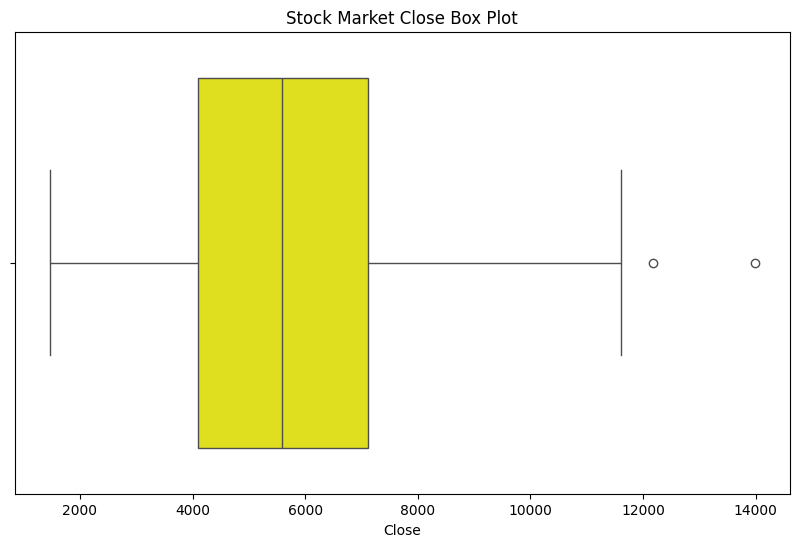

In [ ]:

# Boxplot for stock market data
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_market_house_price_index_data_clean['Close'],color='yellow')
plt.title('Stock Market Close Box Plot')
plt.show()

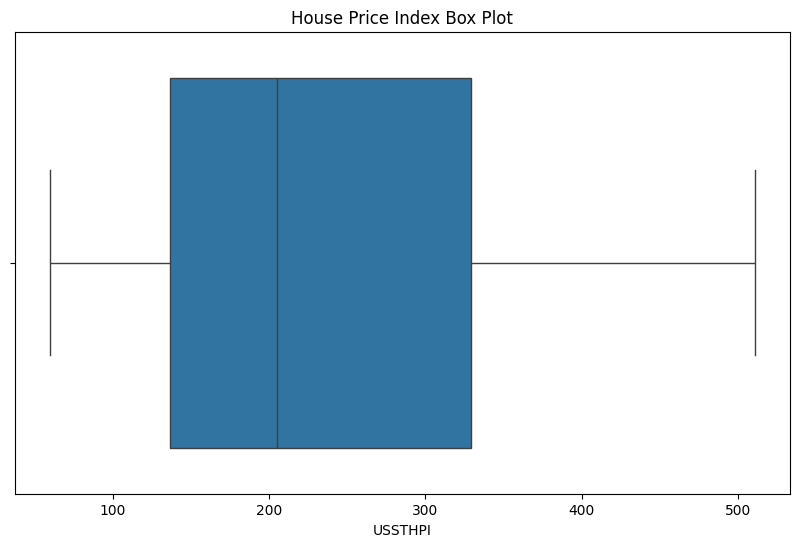

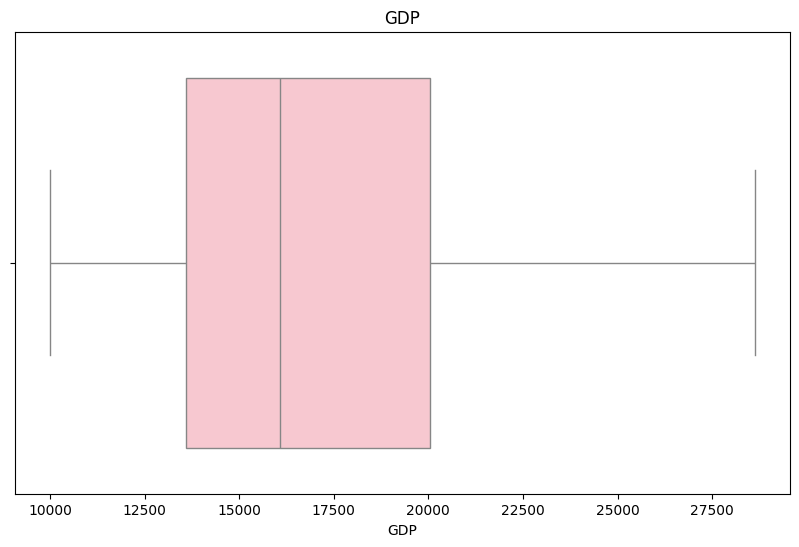

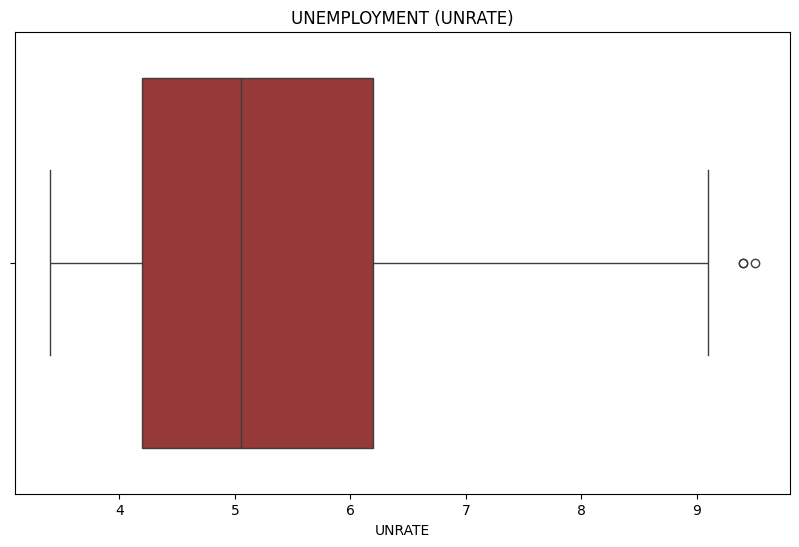

In [ ]:
# clean data sets
# Boxplot for House Price Index (USSTHPI)
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_market_house_price_index_data_clean['USSTHPI'])
plt.title('House Price Index Box Plot')
plt.show()

# Boxplot for GDP
plt.figure(figsize=(10, 6))
sns.boxplot(data=GDP_house_price_index_data_clean, x='GDP', color='pink')
plt.title('GDP')
plt.xlabel('GDP')
plt.show()


# Boxplot for Unemployment
plt.figure(figsize=(10, 6))
sns.boxplot(data=Unemployment_house_price_index_data_clean, x='UNRATE', color='brown')
plt.title('UNEMPLOYMENT (UNRATE)')
plt.xlabel('UNRATE')
plt.show()


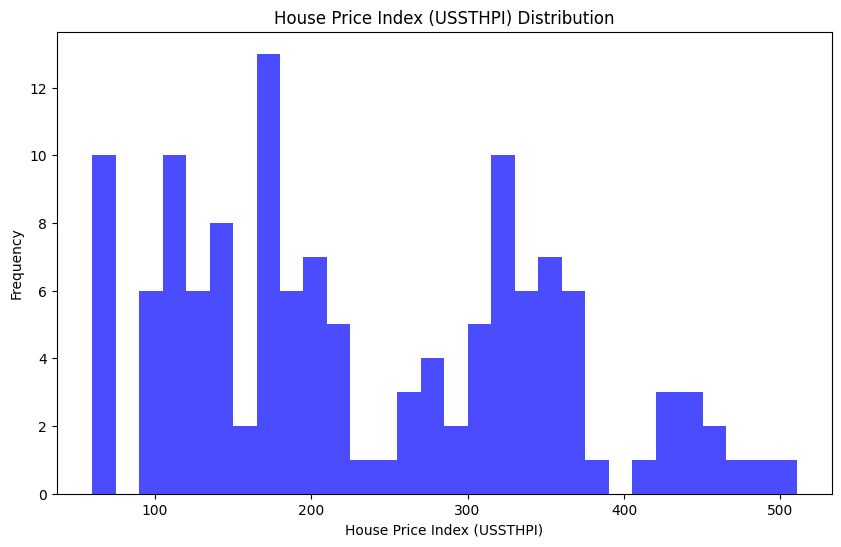

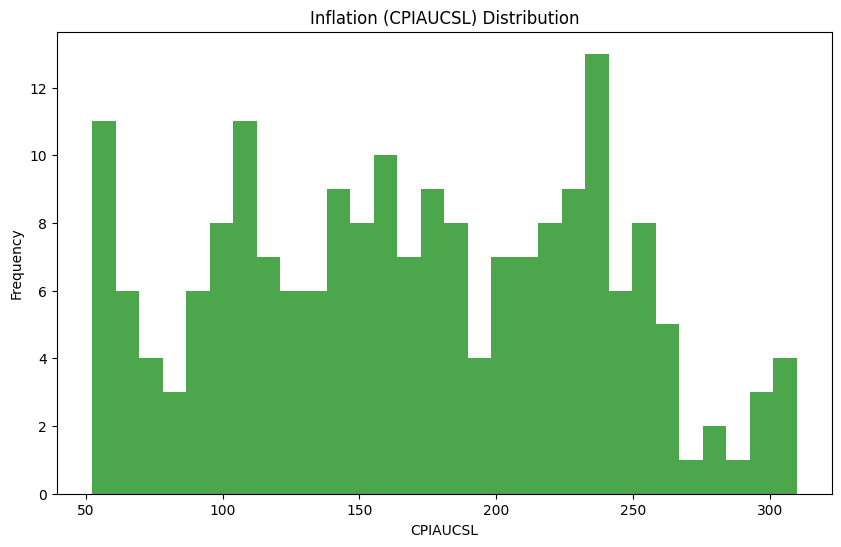

In [ ]:
# 1. Histogram for House Price Index (USSTHPI)
plt.figure(figsize=(10, 6))
plt.hist(stock_market_house_price_index_data_clean['USSTHPI'], bins=30, color='blue', alpha=0.7)
plt.title('House Price Index (USSTHPI) Distribution')
plt.xlabel('House Price Index (USSTHPI)')
plt.ylabel('Frequency')
plt.show()
# 2. Histogram for Inflation (CPIAUCSL)
plt.figure(figsize=(10, 6))
plt.hist(inflation_house_price_index_data_clean['CPIAUCSL'], bins=30, color='green', alpha=0.7)
plt.title('Inflation (CPIAUCSL) Distribution')
plt.xlabel('CPIAUCSL')
plt.ylabel('Frequency')
plt.show()

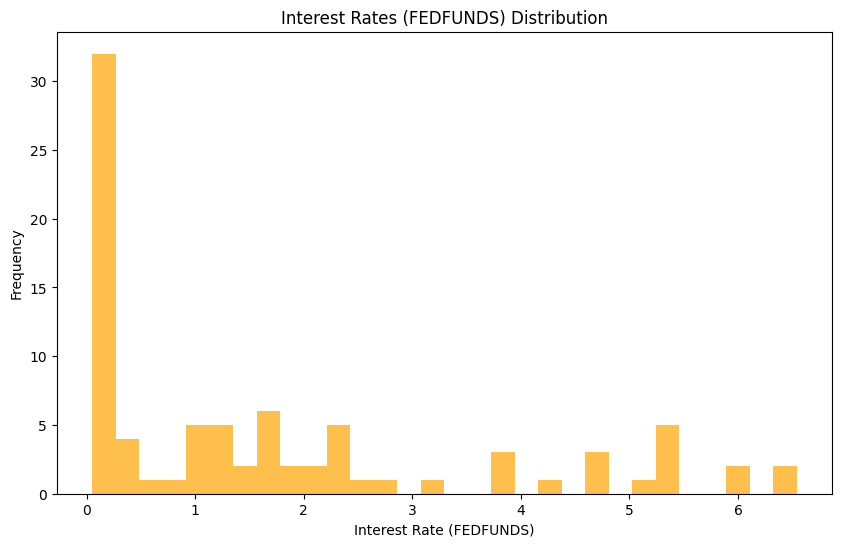

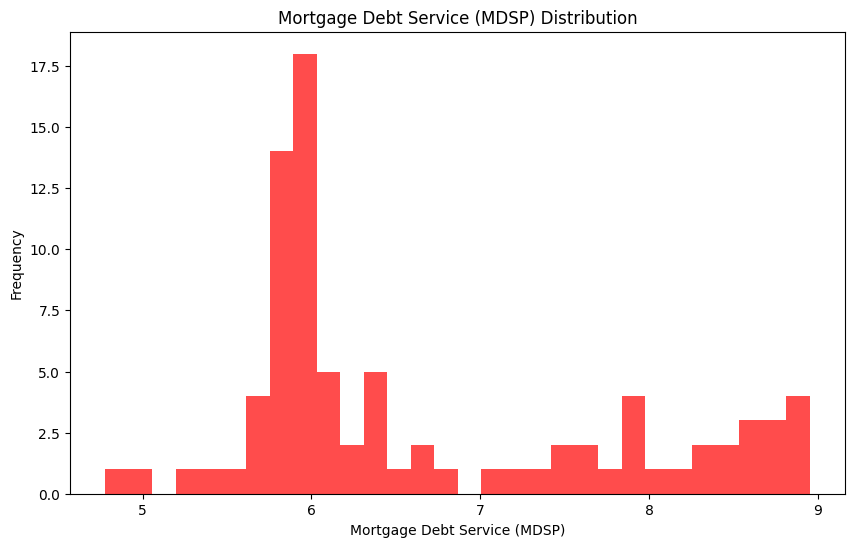

In [ ]:
# 3. Histogram for Interest Rates (FEDFUNDS)
plt.figure(figsize=(10, 6))
plt.hist(interest_rate_house_price_index_data_clean['FEDFUNDS'], bins=30, color='orange', alpha=0.7)
plt.title('Interest Rates (FEDFUNDS) Distribution')
plt.xlabel('Interest Rate (FEDFUNDS)')
plt.ylabel('Frequency')
plt.show()

# 4. Histogram for Mortgage Debt Service (MDSP)
plt.figure(figsize=(10, 6))
plt.hist(mortgage_debt_service_house_price_index_data_clean['MDSP'], bins=30, color='red', alpha=0.7)
plt.title('Mortgage Debt Service (MDSP) Distribution')
plt.xlabel('Mortgage Debt Service (MDSP)')
plt.ylabel('Frequency')
plt.show()

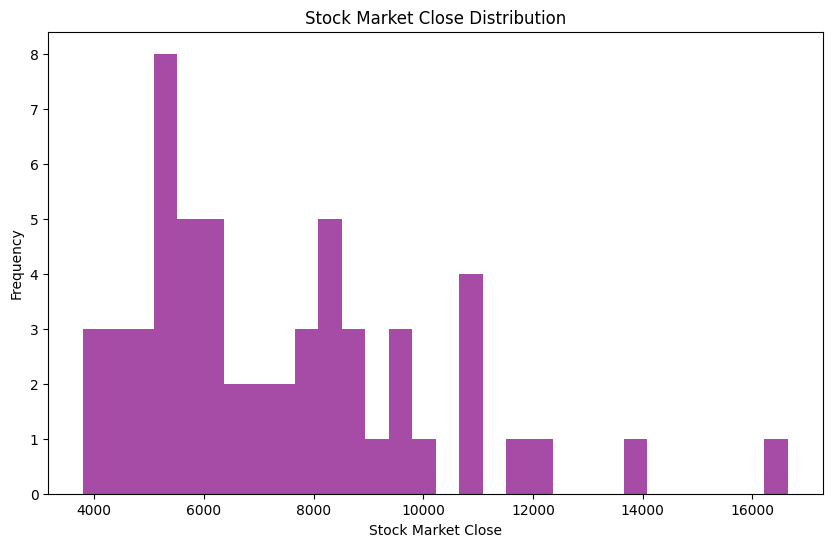

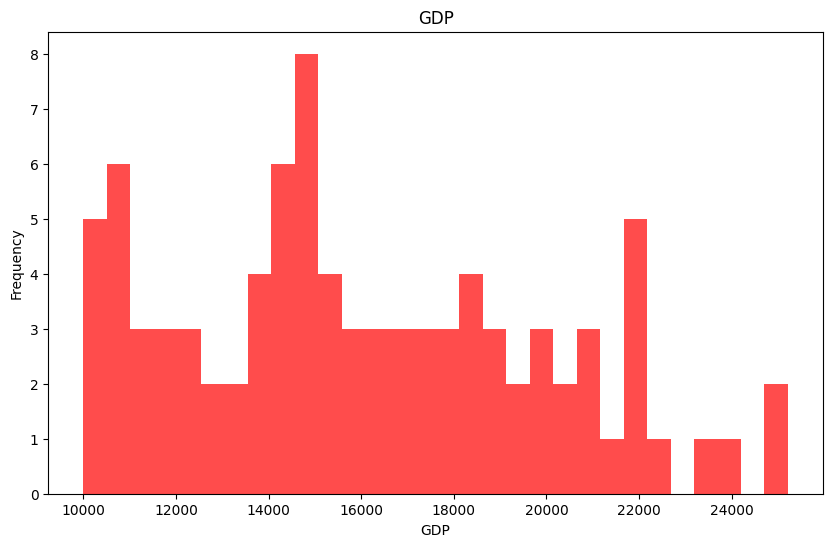

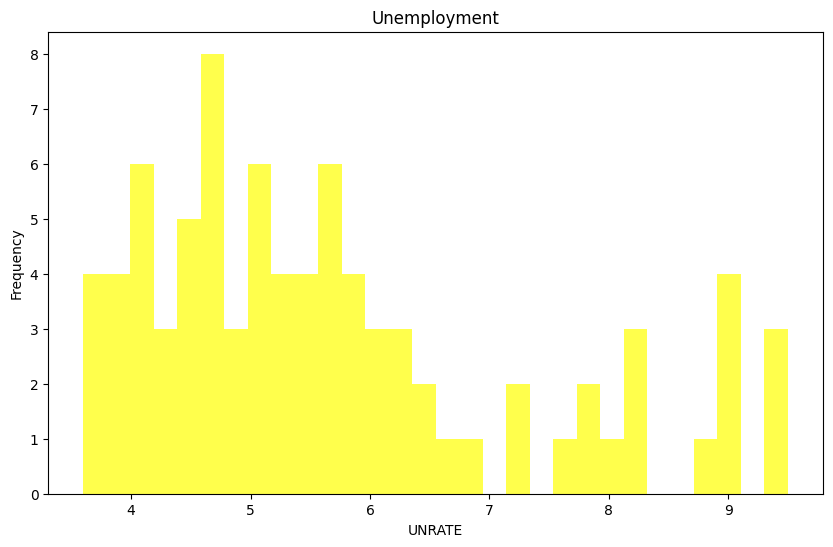

In [ ]:
# 5. Histogram for Stock Market Data (Close)
plt.figure(figsize=(10, 6))
plt.hist(stock_market_house_price_index_data_clean['Close'], bins=30, color='purple', alpha=0.7)
plt.title('Stock Market Close Distribution')
plt.xlabel('Stock Market Close')
plt.ylabel('Frequency')
plt.show()

# 6. Histogram for GDP
plt.figure(figsize=(10, 6))
plt.hist(GDP_house_price_index_data_clean['GDP'], bins=30, color='red', alpha=0.7)
plt.title('GDP')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()

# 7. Histogram for Unemployment
plt.figure(figsize=(10, 6))
plt.hist(Unemployment_house_price_index_data_clean['UNRATE'], bins=30, color='yellow', alpha=0.7)
plt.title('Unemployment')
plt.xlabel('UNRATE')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Merge interest rate data
inflation_interest_house_price_index_data = pd.merge(inflation_house_price_index_data_clean, interest_rate_data_clean,
                                                      left_on='observation_date', right_on='observation_date', how='inner')

# Merge stock market data
inflation_interest_stock_house_price_index_data = pd.merge(inflation_interest_house_price_index_data, stock_market_data_clean,
                                                           left_on='observation_date', right_on='observation_date', how='inner')
# Merge GDP
GDP_inflation_interest_stock_house_price_index_data = pd.merge(inflation_interest_stock_house_price_index_data, GDP_data_clean,
                                                           left_on='observation_date', right_on='observation_date', how='inner')
# Merge GDP
Unemployment_GDP_inflation_interest_stock_house_price_index_data = pd.merge(GDP_inflation_interest_stock_house_price_index_data, Unemployment_data_clean,
                                                           left_on='observation_date', right_on='observation_date', how='inner')
# Merge mortgage debt service data
final_combined_data = pd.merge(Unemployment_GDP_inflation_interest_stock_house_price_index_data, mortgage_debt_service_data_clean,
                               left_on='observation_date', right_on='observation_date', how='inner')
# Verify the final combined data
print(final_combined_data.head())

  observation_date  USSTHPI  CPIAUCSL  FEDFUNDS      Index          Open  \
0       2001-01-01   247.76     175.6      5.98        HSI  14864.040040   
1       2001-01-01   247.76     175.6      5.98  000001.SS   2055.827881   
2       2001-01-01   247.76     175.6      5.98     GSPTSE   8878.299805   
3       2001-01-01   247.76     175.6      5.98  399001.SZ   4709.370117   
4       2001-01-01   247.76     175.6      5.98      GDAXI   6376.100098   

           High           Low         Close     Adj Close        Volume  \
0  15154.919920  14785.009770  15095.530270  15095.530270  0.000000e+00   
1   2073.877930   2055.504883   2073.477051   2073.477051  0.000000e+00   
2   8998.299805   8861.700195   8933.700195   8933.700195  4.909270e+09   
3   4755.240234   4709.370117   4752.750000   4752.696777  0.000000e+00   
4   6469.740234   6364.100098   6433.609863   6433.609863  1.581500e+07   

         GDP  UNRATE      MDSP  
0  10470.231     4.2  5.720924  
1  10470.231     4.2  5.72

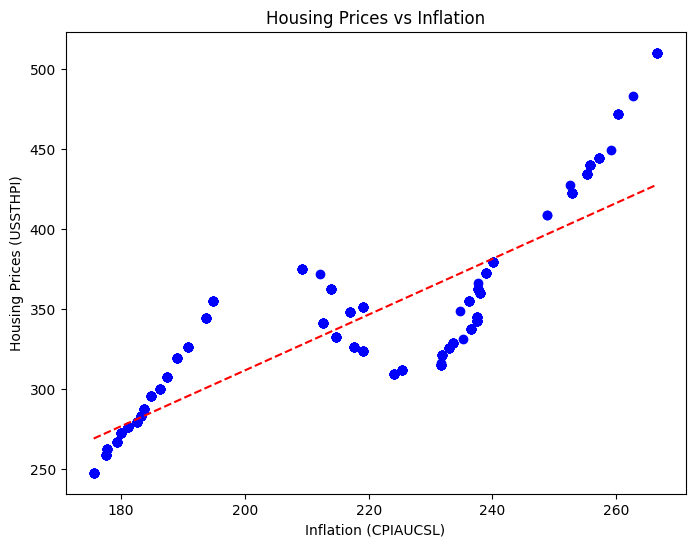

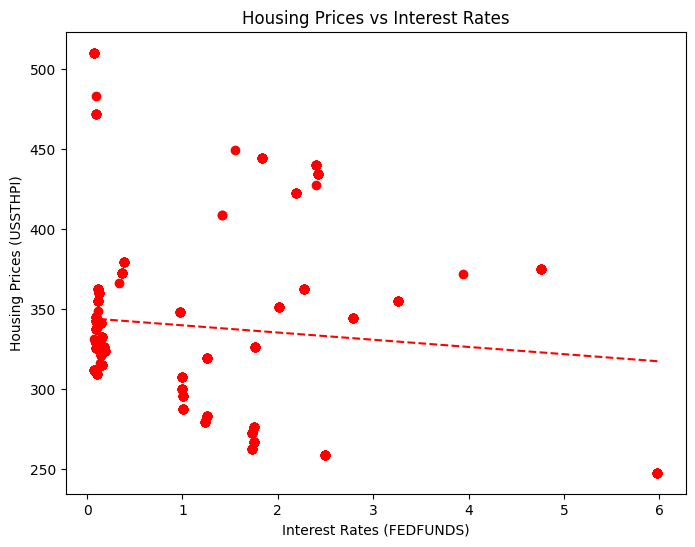

In [ ]:
# Scatter plot for Housing Prices vs Inflation
plt.figure(figsize=(8, 6))
plt.scatter(final_combined_data['CPIAUCSL'], final_combined_data['USSTHPI'], color='blue')
plt.title('Housing Prices vs Inflation')
plt.xlabel('Inflation (CPIAUCSL)')
plt.ylabel('Housing Prices (USSTHPI)')

# Add a trendline
z = np.polyfit(final_combined_data['CPIAUCSL'], final_combined_data['USSTHPI'], 1)
p = np.poly1d(z)
plt.plot(final_combined_data['CPIAUCSL'], p(final_combined_data['CPIAUCSL']), "r--")

plt.show()

# Scatter plot for Housing Prices vs Interest Rates
plt.figure(figsize=(8, 6))
plt.scatter(final_combined_data['FEDFUNDS'], final_combined_data['USSTHPI'], color='red')
plt.title('Housing Prices vs Interest Rates')
plt.xlabel('Interest Rates (FEDFUNDS)')
plt.ylabel('Housing Prices (USSTHPI)')

# Add a trendline
z = np.polyfit(final_combined_data['FEDFUNDS'], final_combined_data['USSTHPI'], 1)
p = np.poly1d(z)
plt.plot(final_combined_data['FEDFUNDS'], p(final_combined_data['FEDFUNDS']), "r--")

plt.show()

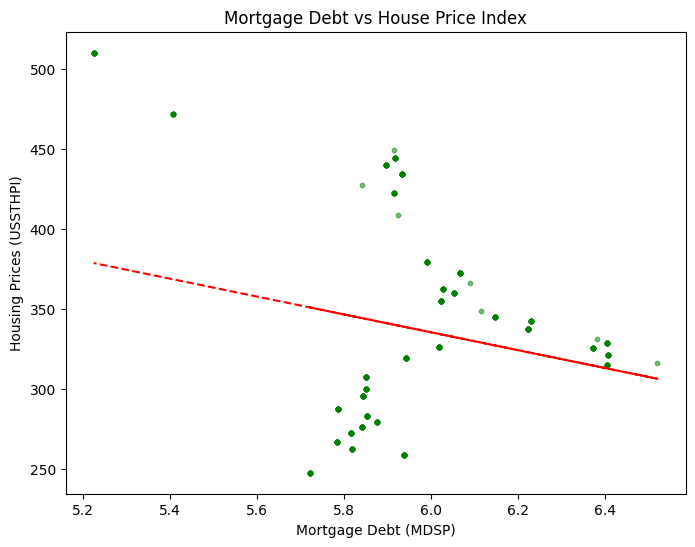

In [ ]:
save_path = "/content/gdrive/My Drive/USA_project/plots"
# Scatter Plot for Mortgage Debt Service Payments (MDSP) vs House Price Index (USSTHPI)
plt.figure(figsize=(8, 6))
plt.scatter(final_combined_data['MDSP'], final_combined_data['USSTHPI'], color='green', alpha=0.5, s=10)
plt.title('Mortgage Debt vs House Price Index')  # Corrected title
plt.xlabel('Mortgage Debt (MDSP)')
plt.ylabel('Housing Prices (USSTHPI)')

# Add a trendline
z = np.polyfit(final_combined_data['MDSP'], final_combined_data['USSTHPI'], 1)
p = np.poly1d(z)
plt.plot(final_combined_data['MDSP'], p(final_combined_data['MDSP']), "r--")
plt.savefig(save_path + 'house_price_index_boxplot.png')
plt.show()


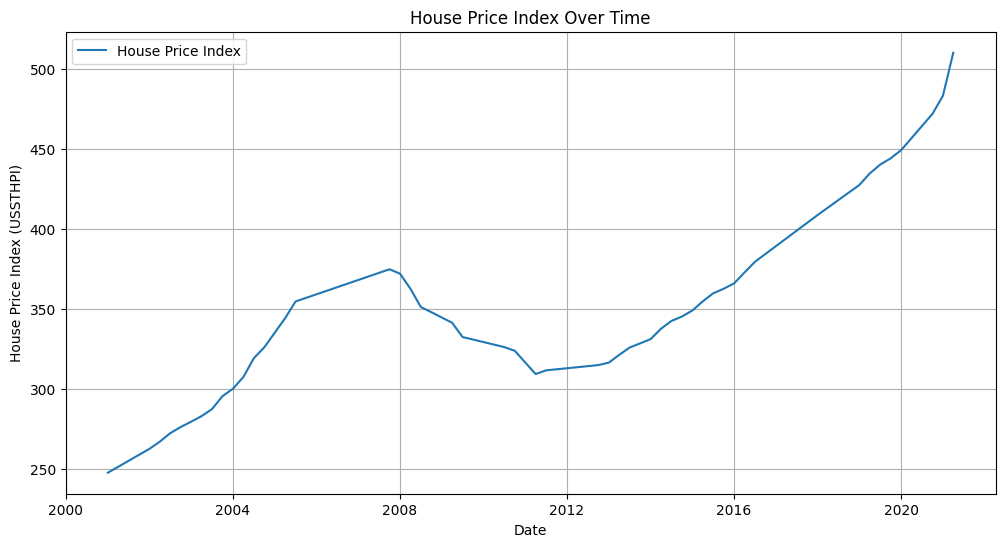

In [ ]:
save_path = "/content/gdrive/My Drive/USA_project"

# Time series plot for House Price Index
plt.figure(figsize=(12, 6))
plt.plot(final_combined_data['observation_date'], final_combined_data['USSTHPI'], label='House Price Index')
plt.xlabel('Date')
plt.ylabel('House Price Index (USSTHPI)')
plt.title('House Price Index Over Time')
plt.legend()
plt.grid(True)
plt.show()





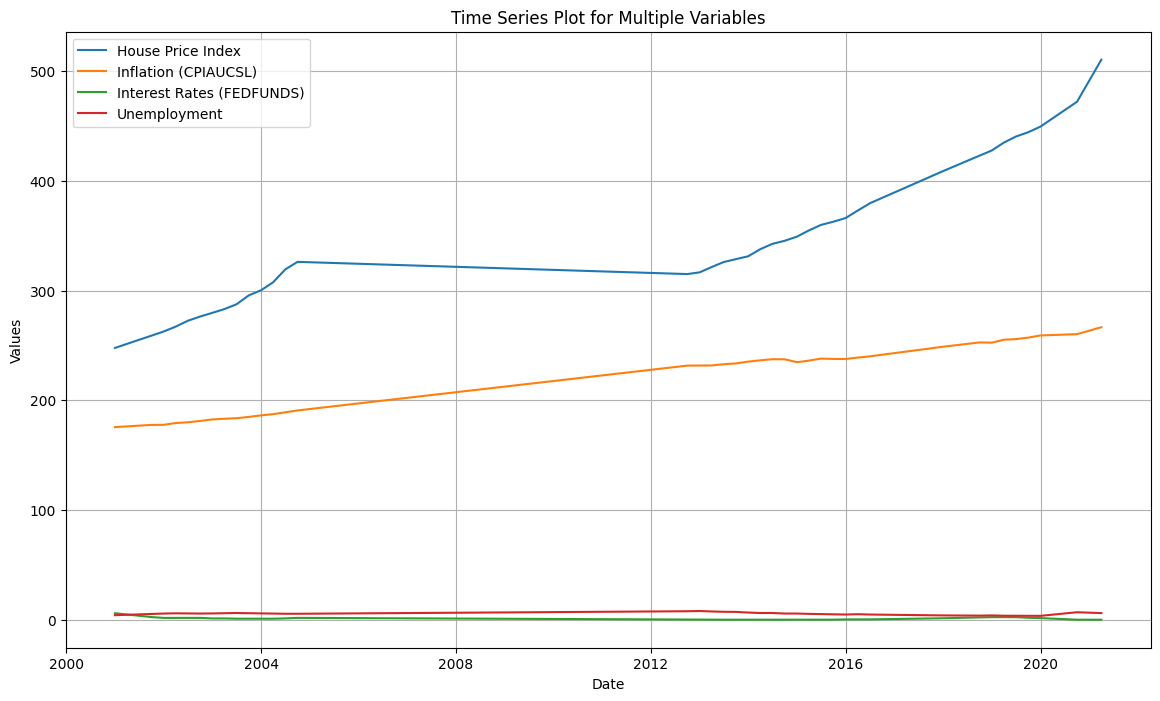

<Figure size 640x480 with 0 Axes>

In [ ]:
save_path = "/content/gdrive/My Drive/USA_project"
# Time series plot for multiple variables
plt.figure(figsize=(14,8))
plt.plot(final_combined_data['observation_date'],final_combined_data['USSTHPI'], label='House Price Index')
plt.plot(final_combined_data['observation_date'],final_combined_data['CPIAUCSL'], label='Inflation (CPIAUCSL)')
plt.plot(final_combined_data['observation_date'],final_combined_data['FEDFUNDS'], label='Interest Rates (FEDFUNDS)')
plt.plot(final_combined_data['observation_date'],final_combined_data['UNRATE'], label='Unemployment')
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Time Series Plot for Multiple Variables")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig(save_path + 'Time Series Plot for Multiple Variables.png')

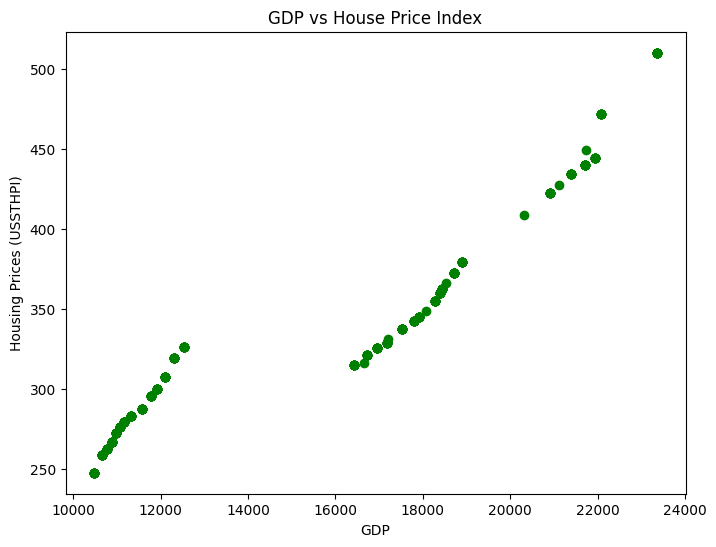

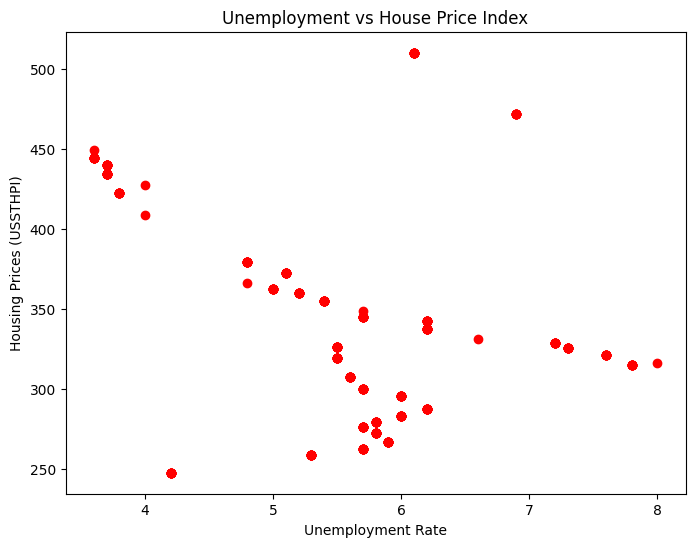

In [ ]:

# Scatter plot for GDP vs House Price Index
plt.figure(figsize=(8, 6))
plt.scatter(final_combined_data['GDP'], final_combined_data['USSTHPI'], color='green')
plt.title('GDP vs House Price Index')
plt.xlabel('GDP')
plt.ylabel('Housing Prices (USSTHPI)')
plt.show()

# Scatter plot for Unemployment vs House Price Index
plt.figure(figsize=(8, 6))
plt.scatter(final_combined_data['UNRATE'], final_combined_data['USSTHPI'], color='red')
plt.title('Unemployment vs House Price Index')
plt.xlabel('Unemployment Rate')
plt.ylabel('Housing Prices (USSTHPI)')
plt.show()


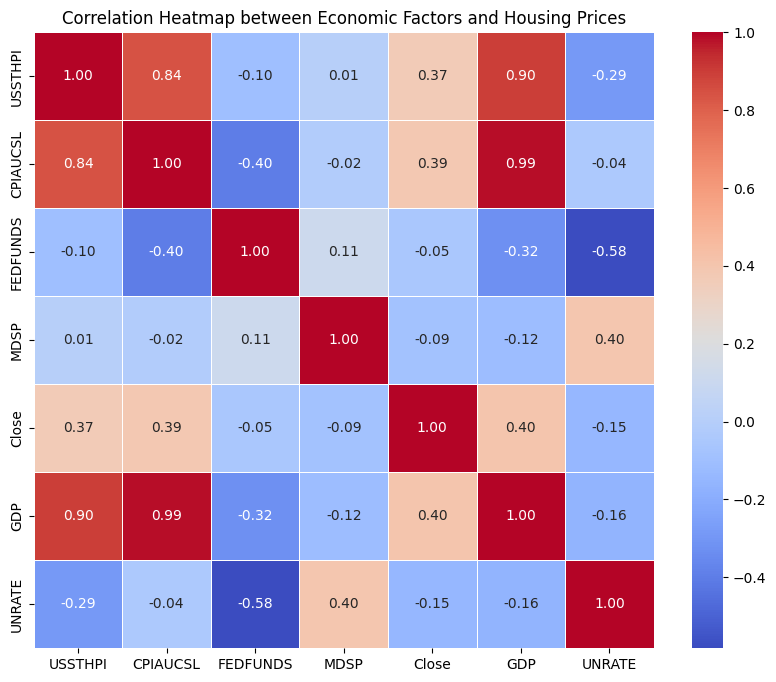

In [ ]:
# Calculate the correlation matrix
correlation_matrix = final_combined_data[['USSTHPI', 'CPIAUCSL', 'FEDFUNDS', 'MDSP', 'Close','GDP','UNRATE']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Economic Factors and Housing Prices')
plt.show()

# Hypotheis testing

In [ ]:
from scipy import stats

# Function to perform hypothesis test (Pearson correlation)
def hypothesis_test(data, x_column, y_column):
    correlation, p_value = stats.pearsonr(data[x_column], data[y_column])
    return correlation, p_value

# Test for Inflation (CPIAUCSL) vs Housing Prices (USSTHPI)
correlation_inflation, p_value_inflation = hypothesis_test(final_combined_data, 'CPIAUCSL', 'USSTHPI')
print("Inflation (CPIAUCSL) vs Housing Prices (USSTHPI):")
print(f"Correlation: {correlation_inflation}, P-value: {p_value_inflation}")
if p_value_inflation < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")

# Test for Interest Rates (FEDFUNDS) vs Housing Prices (USSTHPI)
correlation_interest_rate, p_value_interest_rate = hypothesis_test(final_combined_data, 'FEDFUNDS', 'USSTHPI')
print("\nInterest Rates (FEDFUNDS) vs Housing Prices (USSTHPI):")
print(f"Correlation: {correlation_interest_rate}, P-value: {p_value_interest_rate}")
if p_value_interest_rate < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")

# Test for Stock Market (Close) vs Housing Prices (USSTHPI)
correlation_stock_market, p_value_stock_market = hypothesis_test(final_combined_data, 'Close', 'USSTHPI')
print("\nStock Market (Close) vs Housing Prices (USSTHPI):")
print(f"Correlation: {correlation_stock_market}, P-value: {p_value_stock_market}")
if p_value_stock_market < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")

# Test for Mortgage Debt Service Payments (MDSP) vs Housing Prices (USSTHPI)
correlation_mortgage_debt, p_value_mortgage_debt = hypothesis_test(final_combined_data, 'MDSP', 'USSTHPI')
print("\nMortgage Debt Service Payments (MDSP) vs Housing Prices (USSTHPI):")
print(f"Correlation: {correlation_mortgage_debt}, P-value: {p_value_mortgage_debt}")
if p_value_mortgage_debt < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")

# Test for GDP vs Housing Prices (USSTHPI)
correlation_GDP, p_value_GDP = hypothesis_test(final_combined_data, 'GDP', 'USSTHPI')
print("\nGDP vs Housing Prices (USSTHPI):")
print(f"Correlation: {correlation_GDP}, P-value: {p_value_GDP}")
if p_value_GDP < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")

# Test for Unemployment vs Housing Prices (USSTHPI)
correlation_UN, p_value_UN = hypothesis_test(final_combined_data, 'UNRATE', 'USSTHPI')
print("\nUNEMPLOYMENT vs Housing Prices (USSTHPI):")
print(f"Correlation: {correlation_UN}, P-value: {p_value_UN}")
if p_value_UN < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")


Inflation (CPIAUCSL) vs Housing Prices (USSTHPI):
Correlation: 0.843037684835366, P-value: 7.028168397133419e-135
Reject the null hypothesis. There is a significant relationship.

Interest Rates (FEDFUNDS) vs Housing Prices (USSTHPI):
Correlation: -0.10183744636944278, P-value: 0.023457161350622015
Reject the null hypothesis. There is a significant relationship.

Stock Market (Close) vs Housing Prices (USSTHPI):
Correlation: 0.36781695401964287, P-value: 2.6478019704043994e-17
Reject the null hypothesis. There is a significant relationship.

Mortgage Debt Service Payments (MDSP) vs Housing Prices (USSTHPI):
Correlation: 0.005823662609985458, P-value: 0.897166293490918
Fail to reject the null hypothesis. There is no significant relationship.

GDP vs Housing Prices (USSTHPI):
Correlation: 0.8956283847638503, P-value: 1.4114961133420597e-175
Reject the null hypothesis. There is a significant relationship.

UNEMPLOYMENT vs Housing Prices (USSTHPI):
Correlation: -0.28935710768337664, P-valu

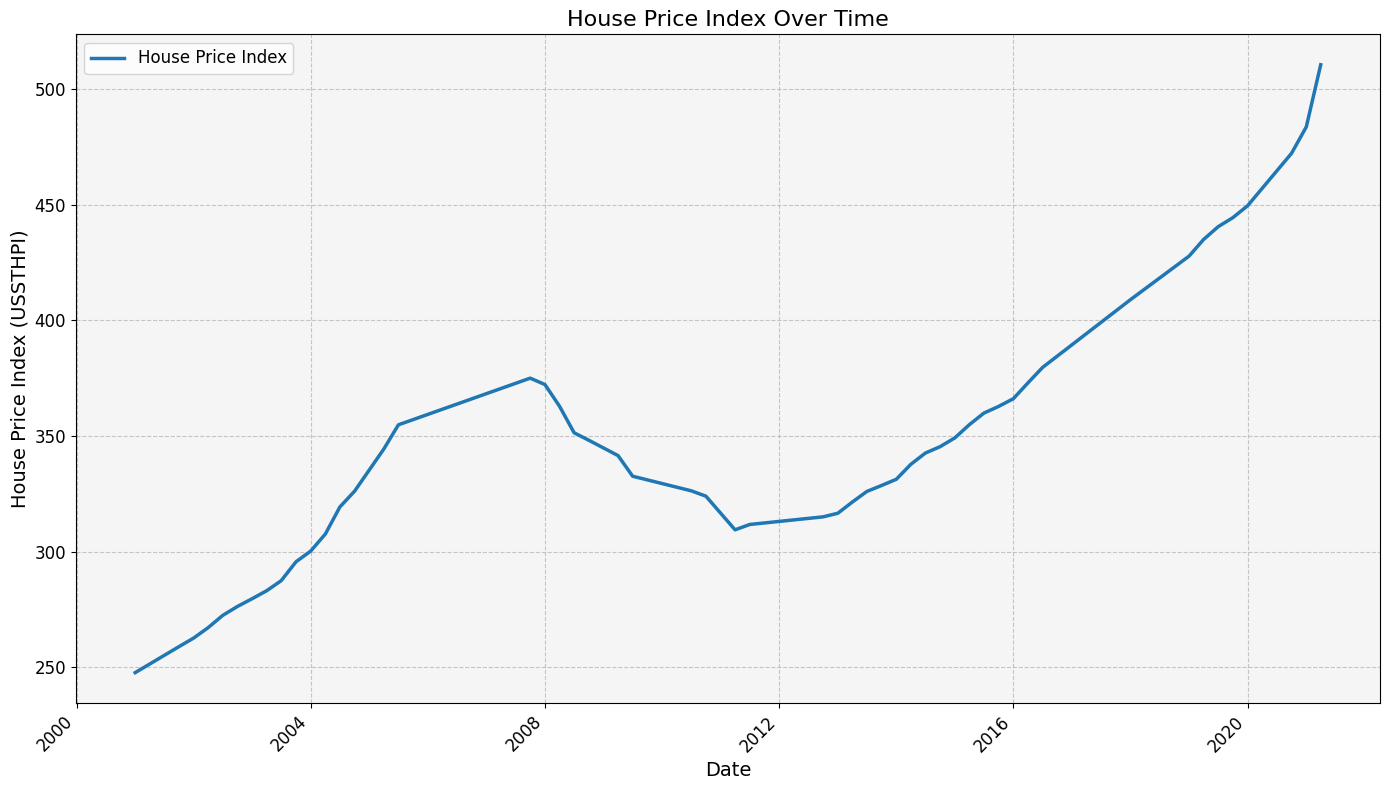

In [ ]:


plt.figure(figsize=(14, 8))  # Adjust figure size for better visualization

# Plot House Price Index over time
sns.lineplot(x='observation_date', y='USSTHPI', data=final_combined_data, label='House Price Index', linewidth=2.5)

# Customize plot elements for better aesthetics
plt.xlabel("Date", fontsize=14)
plt.ylabel("House Price Index (USSTHPI)", fontsize=14)
plt.title("House Price Index Over Time", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Add a subtle grid
plt.legend(fontsize=12)

# Add a light background color to the plot area
ax = plt.gca()
ax.set_facecolor('#f5f5f5')


# Improve the overall layout
plt.tight_layout()

plt.show()


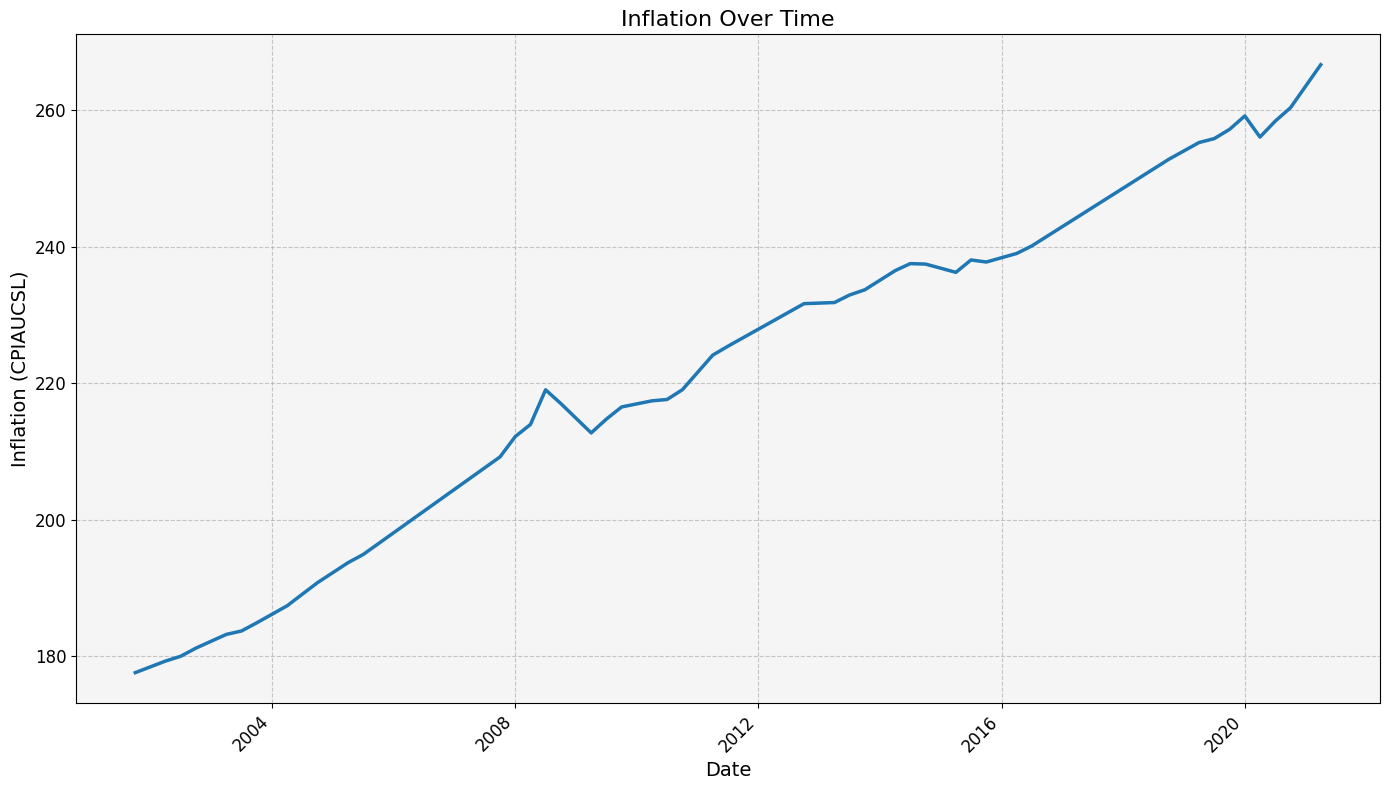

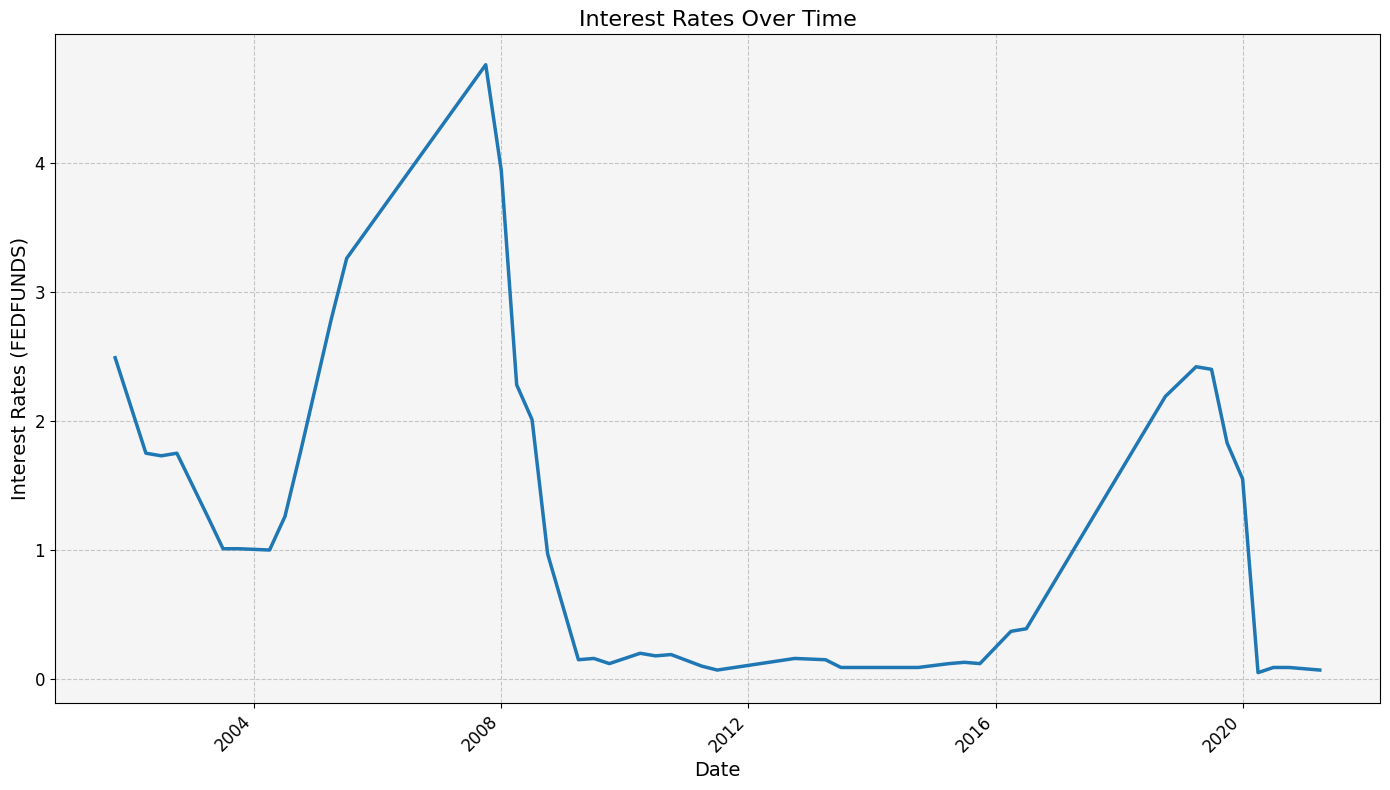

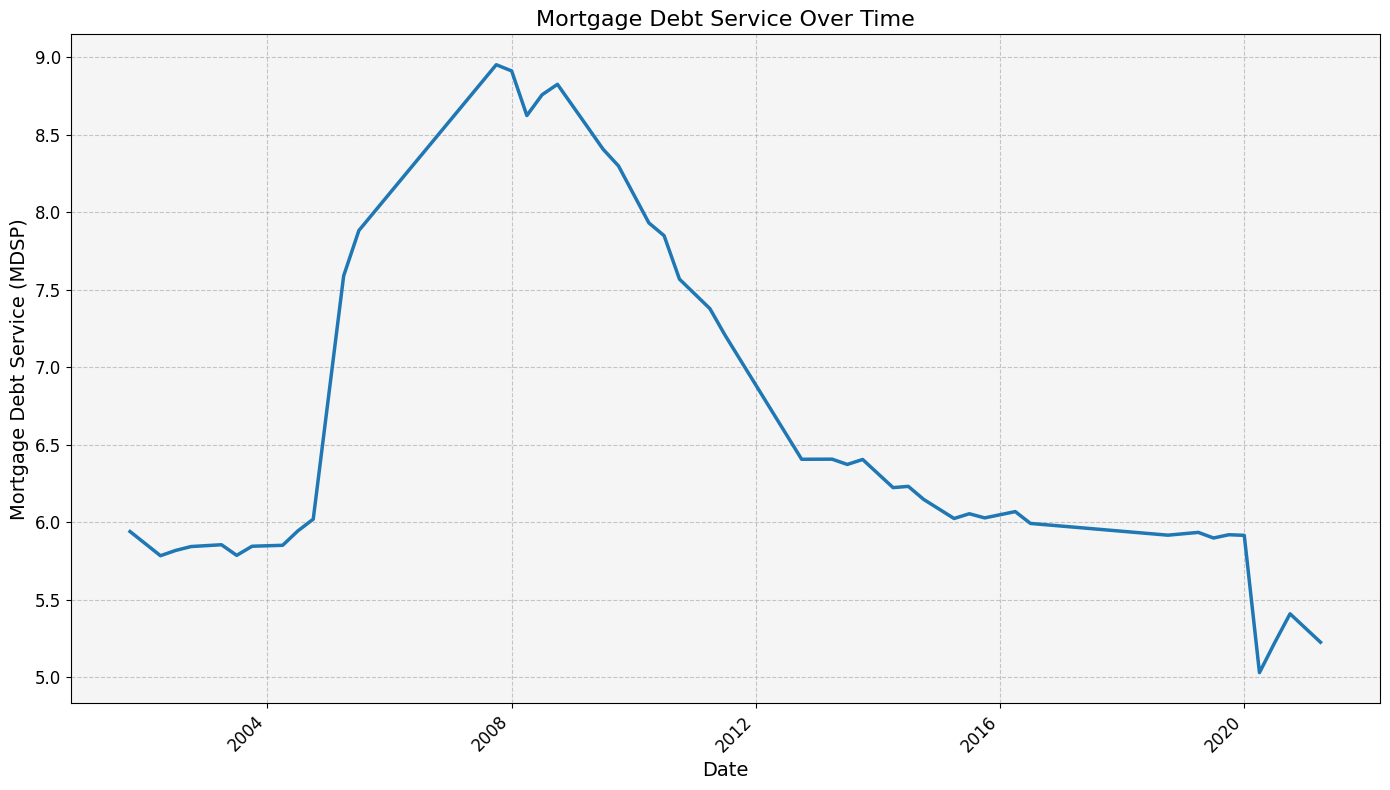

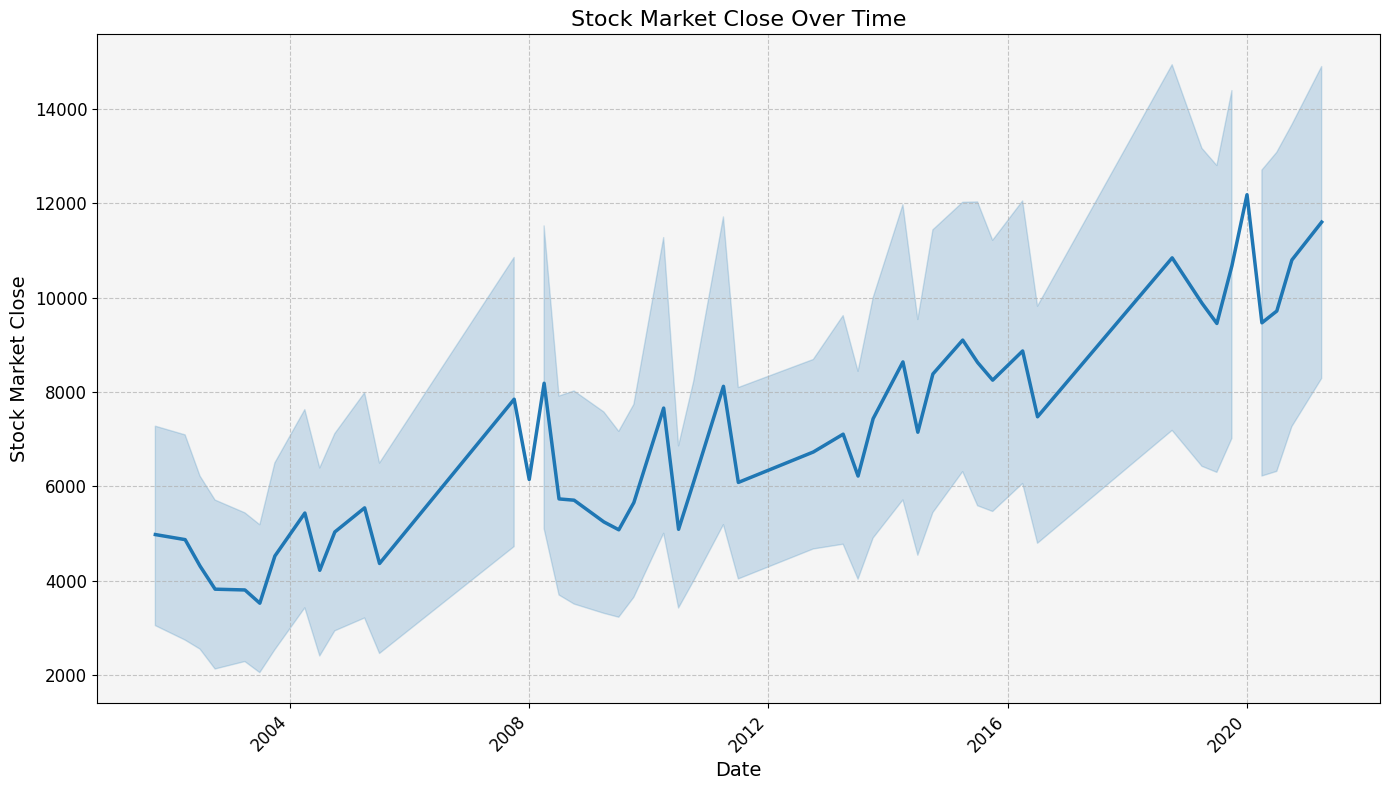

In [ ]:
save_path = "/content/gdrive/My Drive/USA_project"
# Define a function to create the plots
def plot_time_series(data, y_column, y_label, title):
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='observation_date', y=y_column, data=data, linewidth=2.5)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    ax = plt.gca()
    ax.set_facecolor('#f5f5f5')
    plt.tight_layout()
    plt.savefig(save_path + 'Plots.png')
    plt.show()

# Plot for CPIAUCSL
plot_time_series(final_combined_data, 'CPIAUCSL', "Inflation (CPIAUCSL)", "Inflation Over Time")

# Plot for FEDFUNDS
plot_time_series(final_combined_data, 'FEDFUNDS', "Interest Rates (FEDFUNDS)", "Interest Rates Over Time")

# Plot for MDSP
plot_time_series(final_combined_data, 'MDSP', "Mortgage Debt Service (MDSP)", "Mortgage Debt Service Over Time")

# Plot for Close (Stock Market)
plot_time_series(final_combined_data, 'Close', "Stock Market Close", "Stock Market Close Over Time")


# Feature engineering


In [ ]:
# Preparing the data for machine learning analysis

# Create lag features for housing prices, inflation, and interest rates
final_combined_data['USSTHPI_Lag1'] = final_combined_data['USSTHPI'].shift(1)  # Lag for housing price index (1 month)
final_combined_data['CPIAUCSL_Lag1'] = final_combined_data['CPIAUCSL'].shift(1)  # Lag for inflation
final_combined_data['FEDFUNDS_Lag1'] = final_combined_data['FEDFUNDS'].shift(1)  # Lag for interest rates
final_combined_data['MDSP_Lag1'] = final_combined_data['MDSP'].shift(1)  # Lag for mortgage debt service payments
final_combined_data['GDP_Lag1'] = final_combined_data['GDP'].shift(1)
final_combined_data['UNRATE_Lag1'] = final_combined_data['UNRATE'].shift(1)

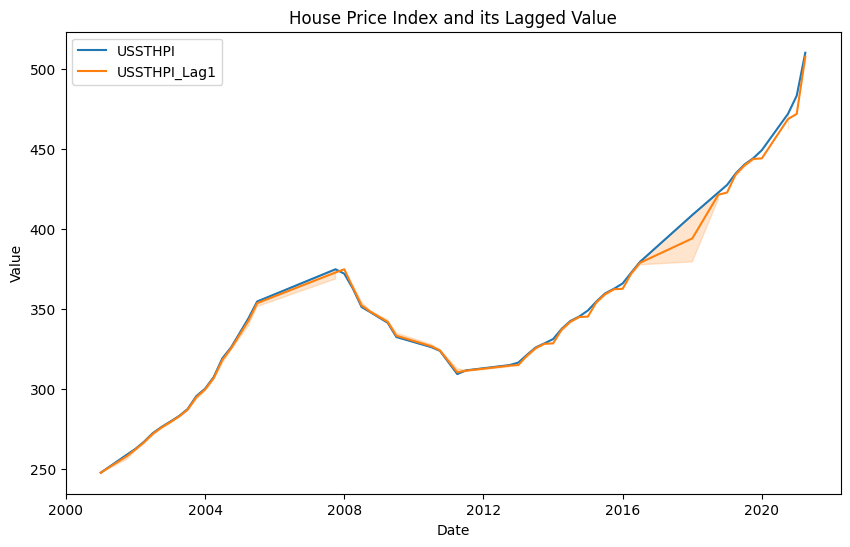

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot USSTHPI against its lagged value
plt.figure(figsize=(10, 6))
sns.lineplot(x=final_combined_data['observation_date'], y=final_combined_data['USSTHPI'], label='USSTHPI')
sns.lineplot(x=final_combined_data['observation_date'], y=final_combined_data['USSTHPI_Lag1'], label='USSTHPI_Lag1')
plt.title('House Price Index and its Lagged Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
#These two lines of code calculate and add new features to the dataset related to the House Price Index (USSTHPI).
final_combined_data['USSTHPI_Diff'] = final_combined_data['USSTHPI'] - final_combined_data['USSTHPI_Lag1']
final_combined_data['USSTHPI_PctChange'] = (final_combined_data['USSTHPI'] - final_combined_data['USSTHPI_Lag1']) / final_combined_data['USSTHPI_Lag1'] * 100

In [ ]:
# Create rolling averages for housing prices, inflation, and interest rates (3-month window)
final_combined_data['USSTHPI_Rolling_Mean_3months'] = final_combined_data['USSTHPI'].rolling(window=3).mean()
final_combined_data['CPIAUCSL_Rolling_Mean_3months'] = final_combined_data['CPIAUCSL'].rolling(window=3).mean()
final_combined_data['FEDFUNDS_Rolling_Mean_3months'] = final_combined_data['FEDFUNDS'].rolling(window=3).mean()
final_combined_data['MDSP_Rolling_Mean_3months'] = final_combined_data['MDSP'].rolling(window=3).mean()
final_combined_data['GDP_Rolling_Mean_3months'] = final_combined_data['GDP'].rolling(window=3).mean()
final_combined_data['UNRATE_Rolling_Mean_3months'] = final_combined_data['UNRATE'].rolling(window=3).mean()

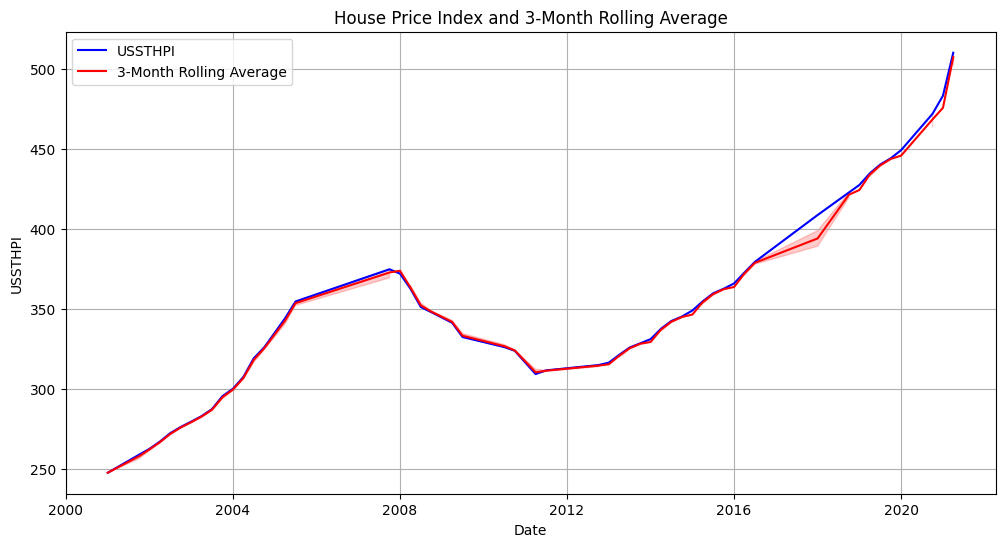

In [ ]:

# Assuming 'final_combined_data' is your DataFrame

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Plot the original USSTHPI
sns.lineplot(x='observation_date', y='USSTHPI',
             data=final_combined_data, label='USSTHPI', color='blue')

# Plot the 3-month rolling average of USSTHPI
sns.lineplot(x='observation_date', y='USSTHPI_Rolling_Mean_3months',
             data=final_combined_data, label='3-Month Rolling Average', color='red')

# Customize the plot
plt.title('House Price Index and 3-Month Rolling Average')
plt.xlabel('Date')
plt.ylabel('USSTHPI')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Extract year, month, and quarter from the observation_date column
final_combined_data['Year'] = final_combined_data['observation_date'].dt.year
final_combined_data['Month'] = final_combined_data['observation_date'].dt.month
final_combined_data['Quarter'] = final_combined_data['observation_date'].dt.quarter

print(final_combined_data.head())

  observation_date  USSTHPI  CPIAUCSL  FEDFUNDS      Index          Open  \
0       2001-01-01   247.76     175.6      5.98        HSI  14864.040040   
1       2001-01-01   247.76     175.6      5.98  000001.SS   2055.827881   
2       2001-01-01   247.76     175.6      5.98     GSPTSE   8878.299805   
3       2001-01-01   247.76     175.6      5.98  399001.SZ   4709.370117   
4       2001-01-01   247.76     175.6      5.98      GDAXI   6376.100098   

           High           Low         Close     Adj Close  ...  \
0  15154.919920  14785.009770  15095.530270  15095.530270  ...   
1   2073.877930   2055.504883   2073.477051   2073.477051  ...   
2   8998.299805   8861.700195   8933.700195   8933.700195  ...   
3   4755.240234   4709.370117   4752.750000   4752.696777  ...   
4   6469.740234   6364.100098   6433.609863   6433.609863  ...   

   USSTHPI_PctChange  USSTHPI_Rolling_Mean_3months  \
0                NaN                           NaN   
1                0.0                  

In [ ]:

# Fill missing values in the final_combined_data DataFrame using forward fill
final_combined_data = final_combined_data.fillna(method='ffill')

# Verify if there are any remaining missing values
print(final_combined_data.isnull().sum())


observation_date                 0
USSTHPI                          0
CPIAUCSL                         0
FEDFUNDS                         0
Index                            0
Open                             0
High                             0
Low                              0
Close                            0
Adj Close                        0
Volume                           0
GDP                              0
UNRATE                           0
MDSP                             0
USSTHPI_Lag1                     1
CPIAUCSL_Lag1                    1
FEDFUNDS_Lag1                    1
MDSP_Lag1                        1
GDP_Lag1                         1
UNRATE_Lag1                      1
USSTHPI_Diff                     1
USSTHPI_PctChange                1
USSTHPI_Rolling_Mean_3months     2
CPIAUCSL_Rolling_Mean_3months    2
FEDFUNDS_Rolling_Mean_3months    2
MDSP_Rolling_Mean_3months        2
GDP_Rolling_Mean_3months         2
UNRATE_Rolling_Mean_3months      2
Year                

<ipython-input-26-bf74bb0b7541>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_combined_data = final_combined_data.fillna(method='ffill')


In [ ]:

# forward fill
final_combined_data = final_combined_data.fillna(method='ffill')

# backward fill
final_combined_data = final_combined_data.fillna(method='bfill')

# Verify if there are any remaining missing values
print(final_combined_data.isnull().sum())

observation_date                 0
USSTHPI                          0
CPIAUCSL                         0
FEDFUNDS                         0
Index                            0
Open                             0
High                             0
Low                              0
Close                            0
Adj Close                        0
Volume                           0
GDP                              0
UNRATE                           0
MDSP                             0
USSTHPI_Lag1                     0
CPIAUCSL_Lag1                    0
FEDFUNDS_Lag1                    0
MDSP_Lag1                        0
GDP_Lag1                         0
UNRATE_Lag1                      0
USSTHPI_Diff                     0
USSTHPI_PctChange                0
USSTHPI_Rolling_Mean_3months     0
CPIAUCSL_Rolling_Mean_3months    0
FEDFUNDS_Rolling_Mean_3months    0
MDSP_Rolling_Mean_3months        0
GDP_Rolling_Mean_3months         0
UNRATE_Rolling_Mean_3months      0
Year                

<ipython-input-27-e0eb864a9005>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_combined_data = final_combined_data.fillna(method='ffill')
<ipython-input-27-e0eb864a9005>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_combined_data = final_combined_data.fillna(method='bfill')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the selected features
scaled_columns = ['USSTHPI', 'CPIAUCSL', 'FEDFUNDS', 'MDSP', 'USSTHPI_Lag1', 'CPIAUCSL_Lag1', 'FEDFUNDS_Lag1', 'MDSP_Lag1', 'GDP_Lag1', 'UNRATE_Lag1', 'USSTHPI_Diff', 'USSTHPI_PctChange','GDP_Rolling_Mean_3months',
                  'USSTHPI_Rolling_Mean_3months', 'CPIAUCSL_Rolling_Mean_3months', 'FEDFUNDS_Rolling_Mean_3months', 'MDSP_Rolling_Mean_3months','UNRATE_Rolling_Mean_3months']


final_combined_data[scaled_columns] = scaler.fit_transform(final_combined_data[scaled_columns])

# Now data is prepared for machine learning analysis


In [ ]:
# Check data types
print(final_combined_data.dtypes)


observation_date                 datetime64[ns]
USSTHPI                                 float64
CPIAUCSL                                float64
FEDFUNDS                                float64
Index                                    object
Open                                    float64
High                                    float64
Low                                     float64
Close                                   float64
Adj Close                               float64
Volume                                  float64
GDP                                     float64
UNRATE                                  float64
MDSP                                    float64
USSTHPI_Lag1                            float64
CPIAUCSL_Lag1                           float64
FEDFUNDS_Lag1                           float64
MDSP_Lag1                               float64
GDP_Lag1                                float64
UNRATE_Lag1                             float64
USSTHPI_Diff                            

# ML

In [ ]:
#ML

from sklearn.model_selection import train_test_split

# Define features and target
X = final_combined_data.drop('USSTHPI', axis=1)  # Features (excluding target)
y = final_combined_data['USSTHPI']  # Target (Housing Prices)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Supervised Learning


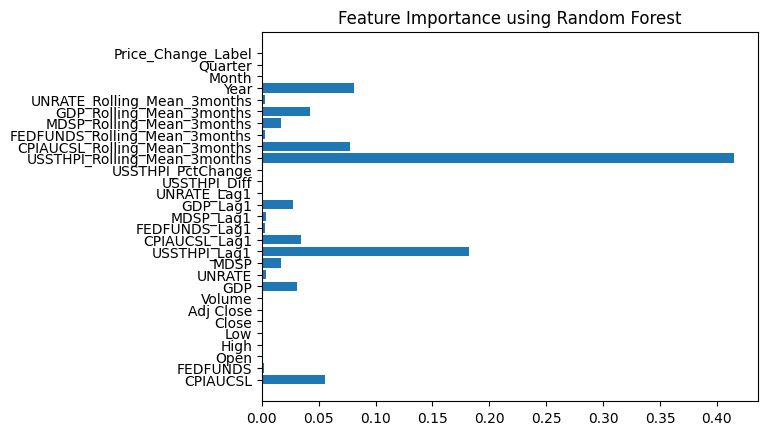

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model to check feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Drop the 'observation_date' column from X_train before fitting the model
# Exclude both 'datetime64[ns]' and 'object' (string) dtypes
X_train_numeric = X_train.select_dtypes(exclude=['datetime64[ns]', 'object'])

# Fit the model using the numeric features
rf_model.fit(X_train_numeric, y_train)

# Get feature importances
feature_importance = rf_model.feature_importances_

# For plotting, use the columns of X_train_numeric
plt.barh(X_train_numeric.columns, feature_importance)
plt.title('Feature Importance using Random Forest')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply scaling to the training and test sets
scaler = StandardScaler()

# Drop 'observation_date' and any other non-numeric columns
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Fit and transform on the training set
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Transform the test set
X_test_scaled = scaler.transform(X_test_numeric)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor # Importing the model

# Make predictions on the test set
y_pred = rf_model.predict(X_test_numeric) # Predicting on the test set

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)  # Use np.sqrt to calculate RMSE

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.001279661708745031
Root Mean Squared Error: 0.03577235956356571
R² Score: 0.999201858827644


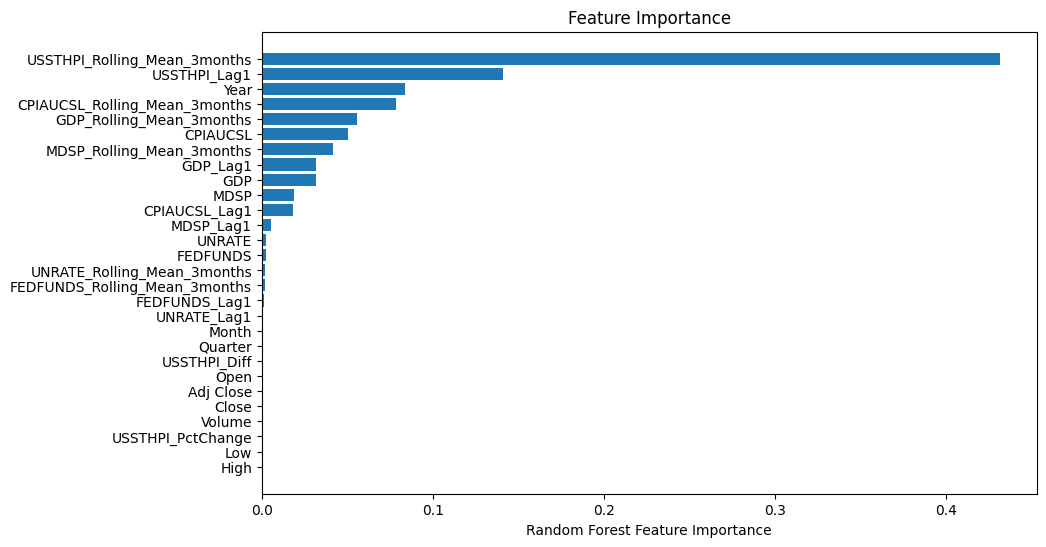

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feature Importance Plot:
plt.figure(figsize=(10, 6))
feature_importance = rf_model.feature_importances_
# Assuming you have already trained your Random Forest model (rf_model)
sorted_idx = feature_importance.argsort()
plt.barh(X_train_numeric.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title('Feature Importance')
plt.show()




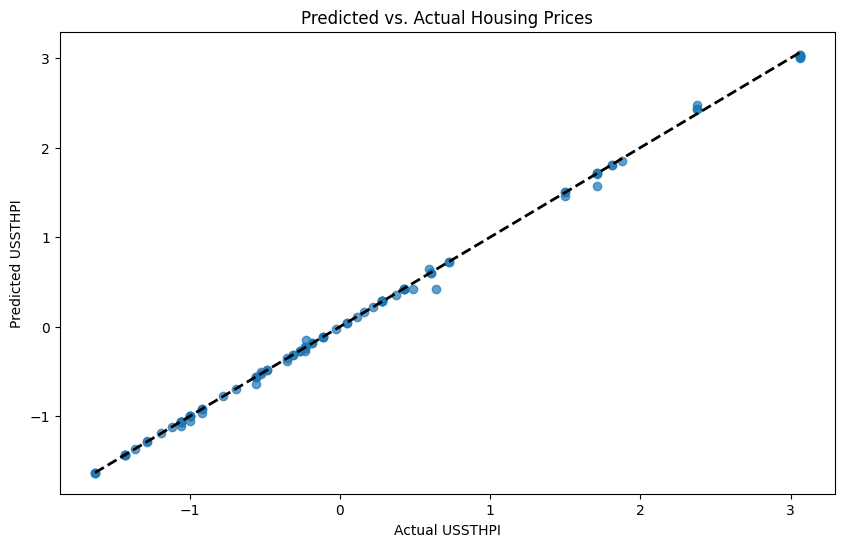

In [ ]:
# 2. Predicted vs. Actual Values Plot:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)  # Assuming y_test and y_pred are your test and predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line
plt.xlabel("Actual USSTHPI")
plt.ylabel("Predicted USSTHPI")
plt.title("Predicted vs. Actual Housing Prices")
plt.show()

KNN - Mean Squared Error: 0.05534216672514611
KNN - Root Mean Squared Error: 0.23524915881921046
KNN - R² Score: 0.9654823915345192


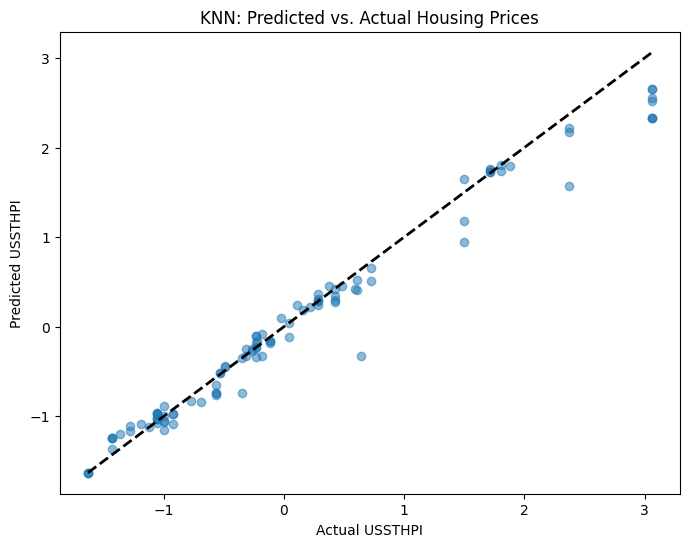

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined from previous code

# Initialize the KNN regressor with k=5 (you can adjust this value)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - Mean Squared Error: {mse_knn}")
print(f"KNN - Root Mean Squared Error: {rmse_knn}")
print(f"KNN - R² Score: {r2_knn}")


# Visualization: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual USSTHPI')
plt.ylabel('Predicted USSTHPI')
plt.title('KNN: Predicted vs. Actual Housing Prices')
plt.show()


# unsupervised method

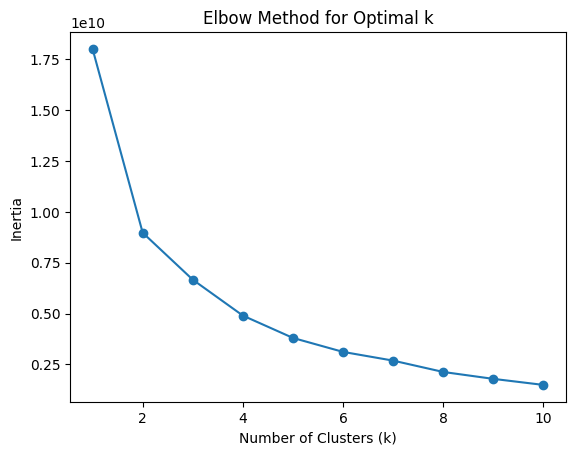

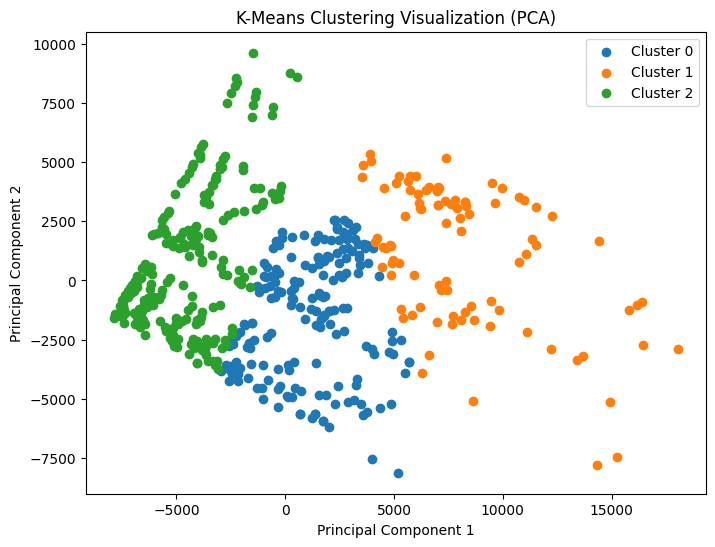

Cluster 0 characteristics:
          USSTHPI    CPIAUCSL    FEDFUNDS        MDSP         Close  \
count  185.000000  185.000000  185.000000  185.000000    185.000000   
mean    -0.291826   -0.174540   -0.056245    0.242432   8519.144690   
std      0.588131    0.814298    1.063588    1.035060   2072.766812   
min     -1.629219   -1.480110   -0.892342   -0.797414   5627.200195   
25%     -0.560694   -1.044060   -0.852843   -0.587372   6720.330078   
50%     -0.229268    0.049576   -0.181360   -0.306499   8351.910156   
75%      0.162483    0.596560    0.434824    1.003022   9507.660156   
max      0.724141    0.903421    3.776440    2.316009  15095.530270   

                GDP      UNRATE  
count    185.000000  185.000000  
mean   14569.047324    6.467027  
std     2572.828941    1.548261  
min    10470.231000    4.200000  
25%    12112.815000    5.400000  
50%    14865.701000    5.800000  
75%    16728.687000    7.300000  
max    18892.639000    9.500000  
Cluster 1 characteristics:


In [ ]:
# K-means clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features for clustering
features_for_clustering = ['USSTHPI', 'CPIAUCSL', 'FEDFUNDS', 'MDSP', 'Close', 'GDP', 'UNRATE']
data_for_clustering = final_combined_data[features_for_clustering]

# Determine the optimal number of clusters (e.g., using the elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, choose the optimal k
optimal_k = 3  # Example: Replace with the k value you determined from the plot

# Perform K-Means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_combined_data['Cluster'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters (example: using the first two principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(data_for_clustering)

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(principal_components[final_combined_data['Cluster'] == cluster, 0],
                principal_components[final_combined_data['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.title('K-Means Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Analyze each cluster to understand its characteristics
for cluster in range(optimal_k):
    print(f"Cluster {cluster} characteristics:")
    print(final_combined_data[final_combined_data['Cluster'] == cluster][features_for_clustering].describe())

# Linear Regression

Linear Regression Model Evaluation:
Mean Squared Error: 0.070626422216715
Root Mean Squared Error: 0.2657563211227816
R² Score: 0.955949408314608

Linear Regression Coefficients:
CPIAUCSL: -2.9049414399599436
FEDFUNDS: -0.08364351713363764
Close: -1.0532527823441694e-06
MDSP: 0.4238359272635925
GDP: 0.0010434981353119846
UNRATE: -0.011024955688318
Intercept: -16.027124231485736


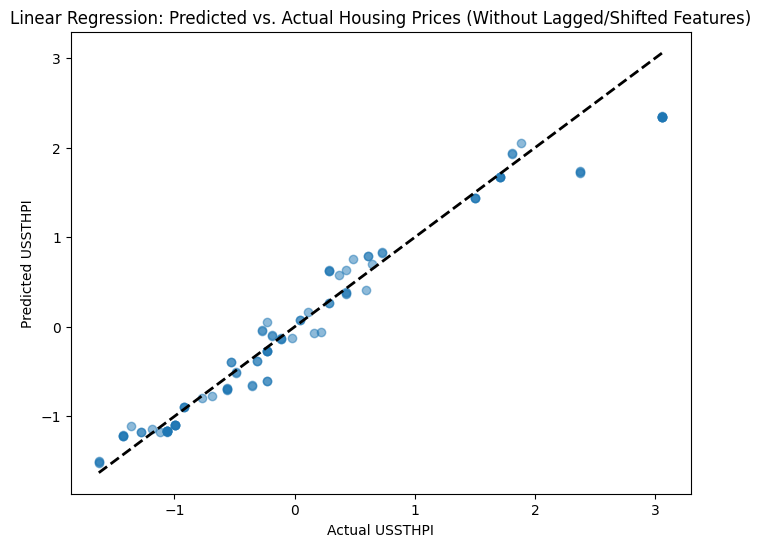

In [ ]:
# we used linear regression without additional columns
# Define features (X) and target (y) for linear regression
# We are explicitly selecting the features without lagged or shifted versions
# and including inflation, interest rate, stock market close, mortgage debt service, GDP, and Unemployment
from sklearn.linear_model import LinearRegression
features = ['CPIAUCSL', 'FEDFUNDS', 'Close', 'MDSP', 'GDP', 'UNRATE']
target = 'USSTHPI'

X = final_combined_data[features]
y = final_combined_data[target]

# Split the data into training and testing sets
# Ensure that the date column is not included in X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error: {mse_linear}")
print(f"Root Mean Squared Error: {rmse_linear}")
print(f"R² Score: {r2_linear}")

# Print the coefficients and intercept of the linear model
print("\nLinear Regression Coefficients:")
for feature, coef in zip(features, linear_model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {linear_model.intercept_}")


# Plotting the predicted vs. actual values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual USSTHPI')
plt.ylabel('Predicted USSTHPI')
plt.title('Linear Regression: Predicted vs. Actual Housing Prices (Without Lagged/Shifted Features)')
plt.show()

# House price index clustering



Simple Cluster Characteristics:

Cluster 0:
          USSTHPI    CPIAUCSL    FEDFUNDS        MDSP         Close  \
count  152.000000  152.000000  152.000000  152.000000    152.000000   
mean     1.070791    1.137044   -0.324232   -0.594785   9686.571673   
std      0.922059    0.383412    0.752435    0.264811   5348.448511   
min     -0.023130    0.705572   -0.892342   -1.705042    835.059998   
25%      0.282596    0.807231   -0.876543   -0.610050   7141.094848   
50%      0.724141    0.903421   -0.844943   -0.537056   9785.379883   
75%      1.809264    1.483626    0.498023   -0.463410  12756.914550   
max      3.058405    1.883573    0.964111   -0.306499  24245.759770   

                GDP      UNRATE  
count    152.000000  152.000000  
mean   19834.706842    5.003289  
std     1874.365664    1.000690  
min    17518.508000    3.600000  
25%    18279.784000    3.800000  
50%    18892.639000    5.100000  
75%    21717.171000    5.700000  
max    23368.861000    6.900000  

Cluster 

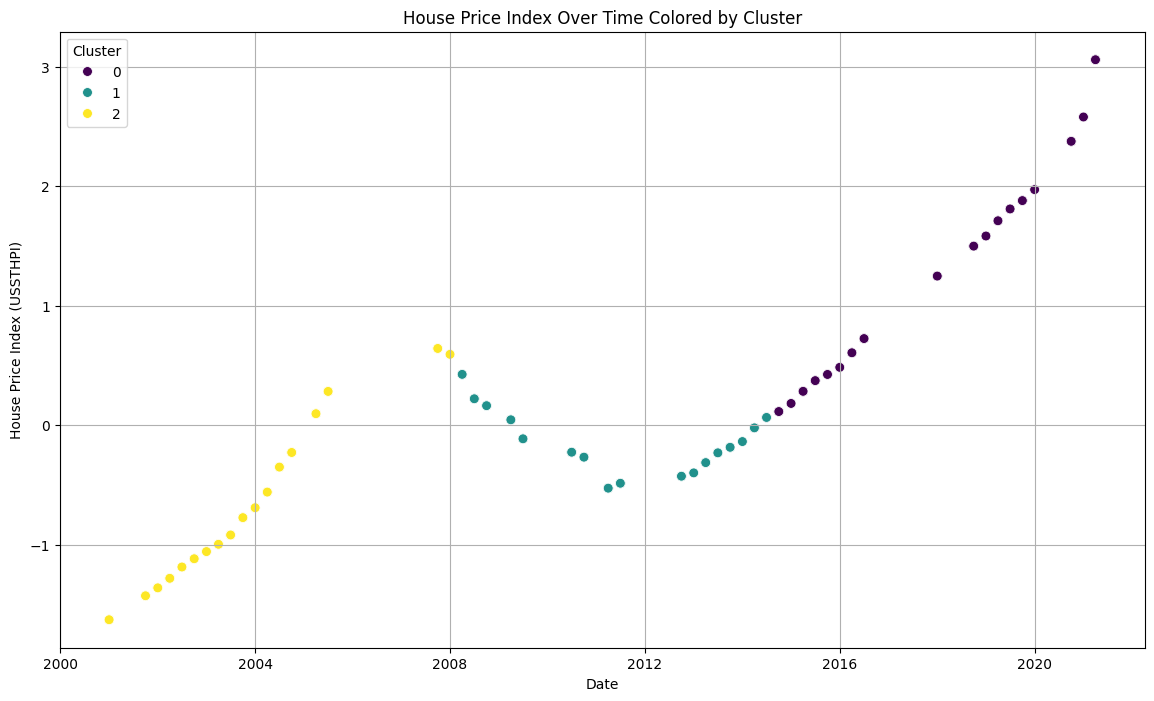

In [ ]:

# Select relevant features for clustering (same as before for consistency)
features_for_clustering_simple = ['USSTHPI', 'CPIAUCSL', 'FEDFUNDS', 'MDSP', 'Close', 'GDP', 'UNRATE']
data_for_clustering_simple = final_combined_data[features_for_clustering_simple].copy() # Create a copy to avoid SettingWithCopyWarning

# It's good practice to scale the data for K-Means
scaler_clustering = StandardScaler()
data_for_clustering_scaled = scaler_clustering.fit_transform(data_for_clustering_simple)

# Perform K-Means clustering with a fixed number of clusters (e.g., k=3)
# We'll skip the elbow method for simplicity as requested.
simple_k = 3  # Choose a reasonable number of clusters
kmeans_simple = KMeans(n_clusters=simple_k, random_state=42, n_init=10) # Added n_init for reproducibility
final_combined_data['Simple_Cluster'] = kmeans_simple.fit_predict(data_for_clustering_scaled)

# Visualize the clusters using PCA to reduce dimensionality
pca_simple = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components_simple = pca_simple.fit_transform(data_for_clustering_scaled)


# Analyze each cluster to understand its characteristics (simplified)
print("\nSimple Cluster Characteristics:")
for cluster in range(simple_k):
  print(f"\nCluster {cluster}:")
  cluster_data = final_combined_data[final_combined_data['Simple_Cluster'] == cluster][features_for_clustering_simple]
  print(cluster_data.describe())

# You can also add a time series plot colored by cluster to see how clusters evolve over time
plt.figure(figsize=(14, 8))
sns.scatterplot(x='observation_date', y='USSTHPI', hue='Simple_Cluster', data=final_combined_data, palette='viridis', s=50)
plt.title('House Price Index Over Time Colored by Cluster')
plt.xlabel('Date')
plt.ylabel('House Price Index (USSTHPI)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()